# **Project 2**, APS1070 Summer 2022
**Anomaly Detection Algorithm using Gaussian Mixture Model**

**Deadline: Jun 25, 11 PM - 15 points**

**Academic Integrity**

This project is individual - it is to be completed on your own. If you have questions, please post your query in the APS1070 Piazza Q&A forums (the answer might be useful to others!).

Do not share your code with others, or post your work online. Do not submit code that you have not written yourself. Students suspected of plagiarism on a project, midterm or exam will be referred to the department for formal discipline for breaches of the Student Code of Conduct.

Please fill out the following:


*   Name: Jigme Tsering
*   Student Number: 1007441975

### How to submit **(HTML + IPYNB)**

1. Download your notebook: `File -> Download .ipynb`

2. Click on the Files icon on the far left menu of Colab

3. Select & upload your `.ipynb` file you just downloaded, and then obtain its path (right click) (you might need to hit the Refresh button before your file shows up)


4. execute the following in a Colab cell:
```
%%shell
jupyter nbconvert --to html /PATH/TO/YOUR/NOTEBOOKFILE.ipynb
```

5. An HTML version of your notebook will appear in the files, so you can download it.

6. Submit **both** <font color='red'>`HTML` and `IPYNB`</font>  files on Quercus for grading.



Ref: https://stackoverflow.com/a/64487858 



##**Part 1: Getting started [2 Marks]**

We are going to work with a credit card fraud dataset. This dataset contains 28 key features, which are not 
directly interpretable but contain meaningful information about the dataset.

Load the dataset in CSV file using Pandas. The dataset is called `creditcard.csv`. Print out the first few columns of the dataset.

* How many rows are there? **284807** **[0.1]**
* What features in the dataset are present aside from the 28 main features?  **'Time' and 'Amount'** **[0.1]**
* Which column contains the targets? **'Class'** **[0. 1]**
* What is the meaning of target values?_**0 means Valid and 1 means Fraud**____ **[0.1]**

In [1]:
pip install wget

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import wget

wget.download('https://github.com/aps1070-2019/datasets/raw/master/creditcard.tar.gz','creditcard.tar.gz')

'creditcard.tar (1).gz'

In [3]:
!tar -zxvf creditcard.tar.gz

creditcard.csv


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
df = pd.read_csv('creditcard.csv')

In [5]:
### YOUR CODE HERE ###
print("No of rows =",df.shape[0])
columns=list(df.columns)
print(columns)
df
print("Since out of :",df.shape[0] , ' no of data points whose class is 0 is :',len(df.loc[df['Class']==0,['Class']]),'Therefore class 0 means non-fraudulant')


No of rows = 284807
['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount', 'Class']
Since out of : 284807  no of data points whose class is 0 is : 284315 Therefore class 0 means non-fraudulant


It's important to know how many examples we have for each class when we work with a new dataset.

* What is the percentage of entries in the dataset for each class? **Class '0': 99.827% and Class '1': 0.173%** **[0.1]**
* Is this data considered balanced or unbalanced? Why is this the case?**Un-balanced** **[0.1]**
* Why is balance/imbalance important? How might this class distribution affect a KNN classifier  for example, which we explored in Project 1? **Knowing Balanced/Imbalanced data sets is important because if the data is unbalanced then the machine learning algorithm that usually maximizes the overall accuracy will give very high  accuracy but it might not do it's task properly in identifying the rare classes** **[0.5]**
* What metrics should we use to evaluate a model in such cases? **In such cases right evaluation metrics can be applied such as Confusion matrix, Precision,Recall and F1 score etc** **[0.2]**


In [6]:
### YOUR CODE HERE ###
print("The percentage of entries with class 0 : ",len(df.loc[df['Class']==0,['Class']])/df.shape[0] * 100)
print("The percetage of entris with class 1 : ",100-len(df.loc[df['Class']==0,['Class']])/df.shape[0] * 100 )

The percentage of entries with class 0 :  99.82725143693798
The percetage of entris with class 1 :  0.17274856306201514


Next, split the dataset into a training (65%), validation (20%) and testing set (15%). Set the random state to 40. **[0.2]**

Make sure to separate out the column corresponding to the targets.

In [7]:
### Split the data  ###

# X_train, X_val, X_test, y_train, y_val, y_test = 0, 0, 0, 0, 0, 0
X=df.loc[:,'V1':'V28']

Y=df[['Class']]

X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.15, random_state=40)
print(type(X_train))
print(type(y_train))
X_train,X_val,y_train,y_val=train_test_split(X_train,y_train,test_size=0.235294,random_state=40)
print(type(X_train))
print(type(y_train))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


Now, let's take a look at the difference in distribution for some variables between fraudulent and non-fraudulent transactions:

In [8]:
X_train=X_train.squeeze()
y_train=y_train.squeeze()

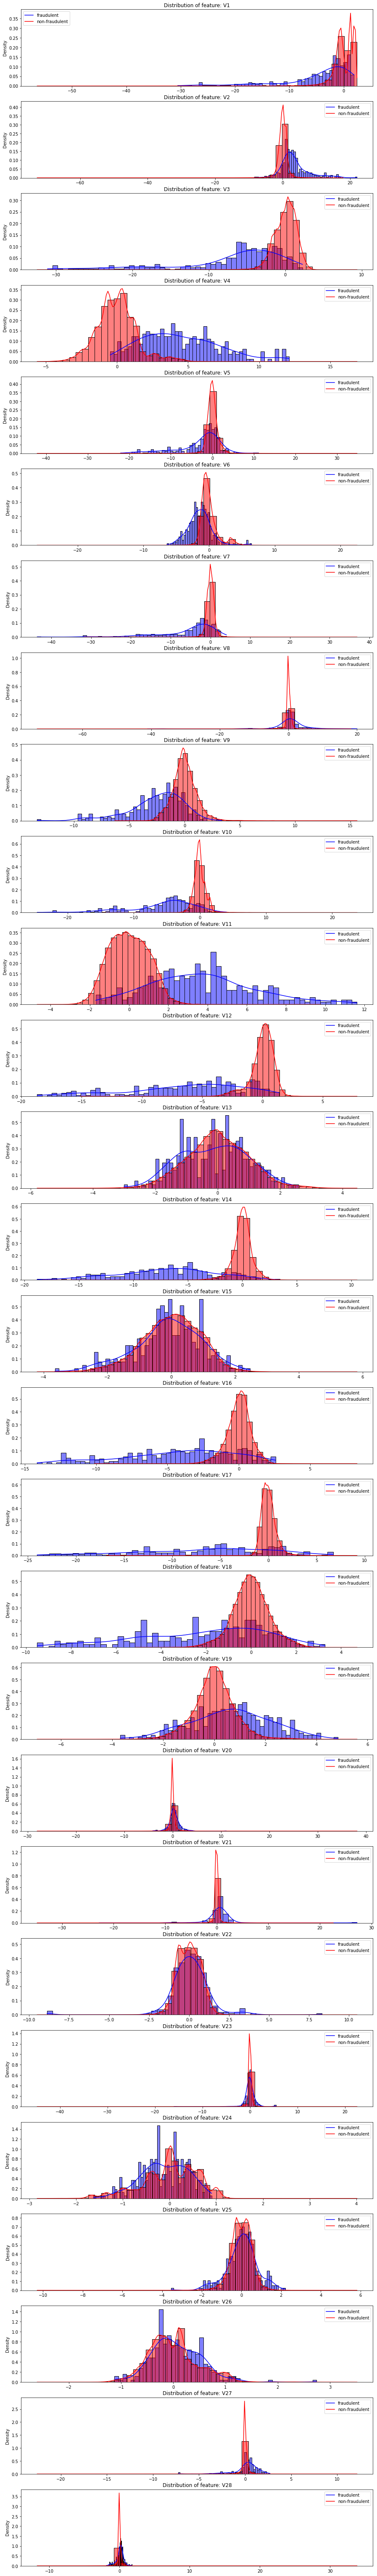

In [9]:
import matplotlib.gridspec as gridspec
features=[f for f in df.columns if 'V' in f]
nplots=np.size(features)
plt.figure(figsize=(15,4*nplots))
gs = gridspec.GridSpec(nplots,1)
for i, feat in enumerate(features):
    ax = plt.subplot(gs[i])
    #sns.histplot(X_train[feat][y_train==1], stat="density", kde=True, color="blue", bins=50)
    #sns.histplot(X_train[feat][y_train==0], stat="density", kde=True, color="red", bins=50)
    sns.histplot(X_train.loc[y_train==1,feat], stat="density", kde=True, color="blue", bins=50)
    sns.histplot(X_train.loc[y_train==0,feat], stat="density", kde=True, color="red", bins=50)
    ax.legend(['fraudulent', 'non-fraudulent'],loc='best')
    ax.set_xlabel('')
    ax.set_title('Distribution of feature: ' + feat)

Explain how these graphs could provide meaningful information about anomaly detection using a gaussian model. **[0.5]**

**The densities in above graphs are like frequentics probabilities. The above graphs shows that Fraudulant data points are rarer than Non-fraudulant data points and they are distributed like a Gaussian both fradulant and non fraudulant.
This means if we find outliers by fitting Gaussian distribution to these data points, then identification of outlier will lead to the detection of anomalies. And also above plots can provide us the insight on what features could lead to better detection of outliers** 


## **Part 2: One Gaussian model with Single feature: [2 Marks]**
We'll start by making a prediction using **a single feature of our dataset at a time**. 

Please note that we **only use `V` features** in our model.

**a. Fitting regardless of class:**
  1. Fit a single Gaussian distribution on a single feature of **the full training dataset** (both classes) using ``sklearn.mixture.GaussianMixture`` when ``n_components=1``. 
  2. Compute AUC (Area under the ROC Curve) based on ``sklearn.mixture.GaussianMixture.score_samples`` on both the full training set and validation set (including both classes).  
  3. Repeat the above steps for each of the features and present your findings in a table. **[0.3]**
  4. Find the best 3 features to distinguish fraudulent transactions from non-fraudulent transactions based on the AUC of the validation set. **[0.2]**
  5. Make a prediction based on a model's scores: If the `score_samples` is lower than a threshold, we consider that transaction as a fraud. Find an optimal threshold that maximizes the F1 Score of the validation set for each of those 3 features separately. (Do not check every possible value for threshold, come up with a faster way! Hint: See Tutorial 2's methods of coming up with thresholds) Compute F1 score using `sklearn.metrics.f1_score`. **[0.5]**
  7. Report Precision, Recall and F1 score on both training and validation set in a table using the threshold you found in previous step. 
  6. Report the complexity of your method (Big O notation) for determining the optimal threshold.**[0.3]**

**b. Fitting based on class:**
 1. Pick 3 features that had the best AUC in Part 2a. 
 2. Repeat part 2a to compute AUC, F1 score, Precision and Recall when you fit a Gaussian **only on non-fraudulent transactions in the training set** in step 1 (instead of all the transactions).
 3. Compare your results from parts 2a and 2b in a table (for both training and validation set). **[0.2]**
 4. Are these results different or similar? Why? **[0.5]**


In [10]:
def partA1(X_train_f,X_val_f,y_train_f,y_val_f):
  auc_score_train=[] #list that stores auc_score for each features for Training set
  auc_score_val=[] # list that stores auc_score for each fearures for Validation set
  p_v_array=np.zeros(len(X_val_f)) # array that stores score_samples for each features for Validation set
  p_t_array=np.zeros(len(X_train)) # array that stores score_samples for each featues for Training set

  for feature in columns[1:-2]:
    gm= GaussianMixture(n_components = 1, covariance_type = 'full', random_state=0)
    gm.fit(X_train_f[[feature]])
    
    p_train=gm.score_samples(X_train[[feature]])
    p_val=gm.score_samples(X_val_f[[feature]])

    auc_score_train.append(roc_auc_score(y_train_f, -1 * p_train))
    auc_score_val.append(roc_auc_score(y_val_f, -1 * p_val) )
    p_v_array=np.vstack([p_v_array,p_val])
    p_t_array=np.vstack([p_t_array,p_train])

  auc_scores=np.array([columns[1:-2],auc_score_train,auc_score_val])
  auc_scores=auc_scores.T
  auc_scores_table=pd.DataFrame(auc_scores,columns=['FeatureName','Train_auc_score','Val_Auc_score']) # Table that contanins AUC score for each feature
  #print(auc_scores_table)

  p_v_array=np.delete(p_v_array,0,0)
  p_v_array=p_v_array.T
  log_p_table=pd.DataFrame(p_v_array,columns=columns[1:-2]) # Table that contains score_samples for each features for validation set
  #print(log_p_table.head(5))

  p_t_array=np.delete(p_t_array,0,0)
  p_t_array=p_t_array.T
  log_pt_table=pd.DataFrame(p_t_array,columns=columns[1:-2]) # Table that contain score_samples for each featues for training set
  #print(log_pt_table.head(5))

  plt.figure(figsize=(15,7))
  plt.plot(columns[1:-2],auc_score_train)
  plt.plot(columns[1:-2],auc_score_val)
  plt.xlabel('Features')
  plt.ylabel('Auc Scores')

  plt.legend(['Training set','Validation set'])
  plt.show()

  sorted_val_score=sorted(auc_score_val)
  best_three_features=[]
  features=columns[1:-2]
  for i in range(-3,0):
    k=auc_score_val.index(sorted_val_score[i])
    best_three_features.append(features[k])

  print('Three Best Features are:', best_three_features)
  return auc_scores_table,log_p_table,log_pt_table,best_three_features







In [11]:
from sklearn.metrics import roc_curve
from sklearn.mixture import GaussianMixture
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_score, recall_score, f1_score

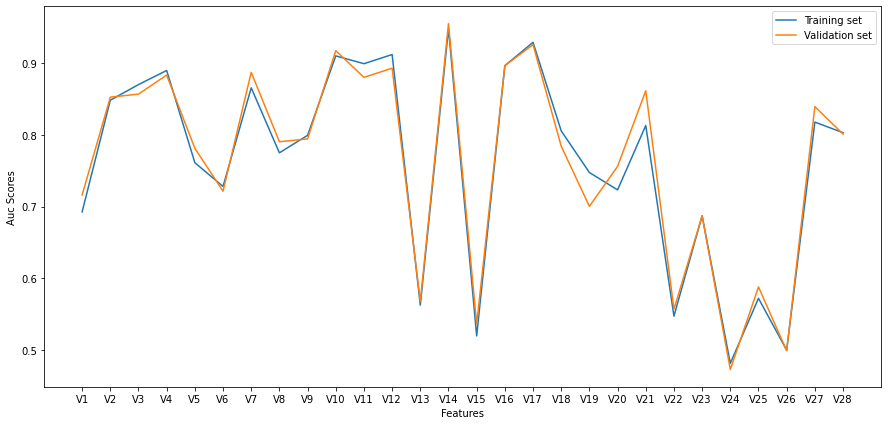

Three Best Features are: ['V10', 'V17', 'V14']


,FeatureName,Train_auc_score,Val_Auc_score
0,V1,0.692540433202598,0.7161175022242452
1,V2,0.8482452385159246,0.8524559806335479
2,V3,0.8700041652997159,0.8567589469836475
3,V4,0.8897153631196573,0.8832795376328513
4,V5,0.7611533352932502,0.7811597801273165
5,V6,0.7279971059014934,0.7214129302793928
6,V7,0.8654974037710063,0.8871633458166946
7,V8,0.7749031264484904,0.7903169463353403
8,V9,0.7992785827266067,0.794322656955853
9,V10,0.9100251904339873,0.9172792824481181


In [12]:
auc_scores_table,log_p_table,log_pt_table,best_three_features=partA1(X_train,X_val,y_train,y_val)
auc_scores_table

In [13]:
def partA5(y_val_f,log_p_table_f):
  from sklearn.metrics import precision_score, recall_score, f1_score
  F1_Th={best_three_features[0]:[],best_three_features[1]:[],best_three_features[2]:[]}
  n=20
  for f in best_three_features:
    th_range=np.linspace(min(log_p_table_f[f].values),max(log_p_table_f[f].values),n)
    max_old=0
    k=0
    while True:
      k=k+1
      F1_Score_=[]
      for i in th_range:
        f1=f1_score(y_val_f, log_p_table_f[f].values<=i)
        F1_Score_.append(f1)
      if abs(max(F1_Score_)-max_old)<0.001:
        break
      max_old=max(F1_Score_)
      th_range=np.linspace(th_range[F1_Score_.index(max(F1_Score_))-1],th_range[F1_Score_.index(max(F1_Score_))+1],int(n/2))
    F1_Th[f]=[max(F1_Score_),th_range[F1_Score_.index(max(F1_Score_))]]
  threshold_table=pd.DataFrame(F1_Th,index=['F1 Score','Threshold'])
  threshold_table
  return threshold_table,F1_Th



In [14]:
threshold_table,F1_Th=partA5(y_val.copy(),log_p_table.copy())
threshold_table

,V10,V17,V14
F1 Score,0.207407,0.597701,0.619289
Threshold,-53.335035,-22.097442,-19.432862


**Since size of the forloop which is present inside the while loop is getting** **halved every time while loop is executed.** 
**So the complexity becomes**: n+n/2+n/2^3+n/2^4+....
               **where 'n' is initial size of forloop**
**let the number of times outer whileloop is executed is denoted by 'N'**
**then: complexity can be written as** n+n/2+n/2^2+..+n/2^N-1 + n/2^N

**which can be re wriiten as** n+n(1+1/2+1/2^2+...+1/2^N)
                          = n+n(1-1/2^N)
                          
**there fore big O notation is : O(n)**

---



In [15]:
def give_final_table(best_three_features_f,y_train_f,y_val_f,log_p_table_f,log_pt_table_f):
  from sklearn.metrics import precision_score, recall_score, f1_score
  dic_1={best_three_features_f[0]:[],best_three_features_f[1]:[],best_three_features_f[2]:[]}
  #print(F1_Th)

  for f in best_three_features_f:
    #print(f)
    #print(type(log_pt_table_f))
    #print(log_pt_table_f[f].values)
    pr_t=precision_score(y_train_f,log_pt_table_f[f].values<=F1_Th[f][1])
    re_t=recall_score(y_train_f,log_pt_table_f[f].values<=F1_Th[f][1])
    f1_t=f1_score(y_train_f,log_pt_table_f[f].values<=F1_Th[f][1])

    pr_v=precision_score(y_val_f,log_p_table_f[f].values<=F1_Th[f][1])
    re_v=recall_score(y_val_f,log_p_table_f[f].values<=F1_Th[f][1])
    f1_v=f1_score(y_val_f,log_p_table_f[f].values<=F1_Th[f][1])

    dic_1[f]=[pr_t,re_t,f1_t,pr_v,re_v,f1_v]

  table_1=pd.DataFrame(dic_1,index=['precision score train','recall score train','F1 score train','Precision Score vali','recall score vali','F1 score vali'])
  table_1
  return table_1


In [54]:
c_table=give_final_table(best_three_features.copy(),y_train.copy(),y_val.copy(),log_p_table.copy(),log_pt_table.copy())
c_table

,V10,V17,V14
precision score train,0.426357,0.658436,0.627119
recall score train,0.170807,0.496894,0.574534
F1 score train,0.243902,0.566372,0.599676
Precision Score vali,0.424242,0.722222,0.642105
recall score vali,0.137255,0.509804,0.598039
F1 score vali,0.207407,0.597701,0.619289


In [55]:
## PART B STARTS HERE
X_train
X_train_new=X_train.copy()
print(len(X_train_new))
X_train_new['Class']=y_train
print(len(X_train))
X_train_new=X_train_new.loc[X_train_new['Class']==0,:]
print(X_train_new.shape)
del X_train_new['Class']
print(X_train_new.shape)




185123
185123
(184801, 29)
(184801, 28)


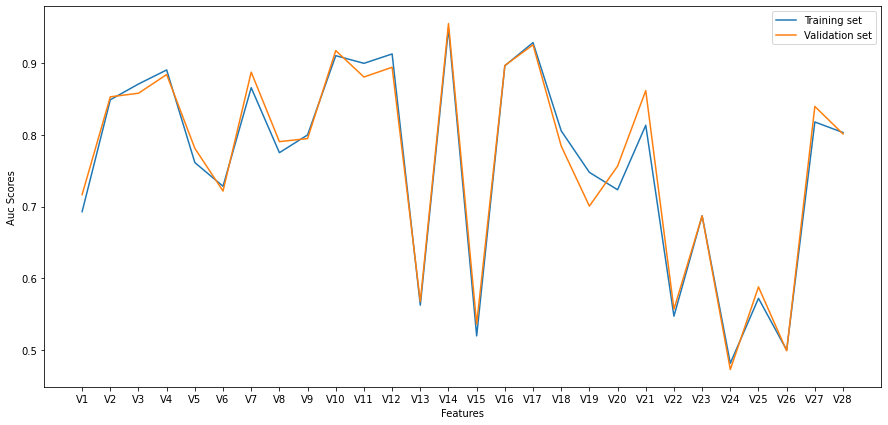

Three Best Features are: ['V10', 'V17', 'V14']


In [56]:
auc_scores_table_new,log_p_table_new,log_pt_table_new,best_three_features_new=partA1(X_train_new,X_val,y_train,y_val)

In [57]:
threshold_table,F1_Th=partA5(y_val.copy(),log_p_table.copy())
threshold_table

,V10,V17,V14
F1 Score,0.207407,0.597701,0.619289
Threshold,-53.335035,-22.097442,-19.432862


In [58]:
c_new=give_final_table(best_three_features.copy(),y_train.copy(),y_val.copy(),log_p_table_new.copy(),log_pt_table_new.copy())
print("Fiitng on both Classes :")
print(c_table)
print('')
print('')
print('fitting only on Non_fraudulant:')
print(c_new)

Fiitng on both Classes :
                            V10       V17       V14
precision score train  0.426357  0.658436  0.627119
recall score train     0.170807  0.496894  0.574534
F1 score train         0.243902  0.566372  0.599676
Precision Score vali   0.424242  0.722222  0.642105
recall score vali      0.137255  0.509804  0.598039
F1 score vali          0.207407  0.597701  0.619289


fitting only on Non_fraudulant:
                            V10       V17       V14
precision score train  0.350000  0.590164  0.560117
recall score train     0.173913  0.559006  0.593168
F1 score train         0.232365  0.574163  0.576169
Precision Score vali   0.368421  0.619565  0.601942
recall score vali      0.137255  0.558824  0.607843
F1 score vali          0.200000  0.587629  0.604878


**No signficant difference between partA and partB is observed. It could be due to the fact that more than 99% of data points are non-fraudulant and Gaussian object sees almost same information in partA and partB**

## **Part 3: One Gaussian model with multiple features: [3 Marks]**
This part is similar to Part 2, but here we will pick multiple features and set the number of components **visually**.

  a. 2D plot:
 1. Pick two features (say, f1 and f2). 
 2. Scatter plot (plt.scatter) those features of the training set on a figure (f1 on the x-axis and f2 on the y-axis). **[0.25]**
 3. On the scatter plot, color the training set based on their class (non-fraudulents blue and fraudulents red). **[0.25]**
 4. Based on your plots, decide how many Gaussian components (``n_components``) you need to fit the data (focus on valid transactions). **[0.25]**
 5. Fit your Gaussian model on the training set (all samples). 
 6. Compute AUC on both training and validation sets. **[0.25]**
 7. Pick 3 new pair of features and repeat steps 2 to 6. **[0.5]**
 8. Pick the set with the highest AUC on the validation set (out of the four sets that you tried).
 9. Find a threshold to maximize your F1 Score on the validation set. **[0.25]**
 10. Plot two seperate figures (one for the training data and one for the validation data) similar to step 3 and put a circle around outliers based on your threshold (use the code of the similar figure in tutorial) **[0.25]**

b. 3D plot:

  1. Pick three features (say, f1, f2 and f3, you can choose the features with highest AUC scores from  part 2.) **[0.25]**
  2. Repeat steps 2 to 6. Use the function below for 3D plotting. Use different angles to get a better undrestanding of the plot. **[0.25]**
  3. Find a threshold to maximize your F1 Score on the validation set. **[0.50]** 




In [21]:
###You can use the following function for 3D plotting in part b  ###

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

def plot_3d(X_train , y_train, f1, f2, f3, angle ):
  X_train_3f = pd.DataFrame(data = X_train,columns=[f1, f2,f3])
  fig = plt.figure(figsize=(20,20))
  ax = plt.axes( projection='3d')
  ax.scatter3D(X_train_3f[f1][y_train==0], X_train_3f[f2][y_train==0], X_train_3f[f3][y_train==0], c='y', marker='x',label ='Non-fraud')
  ax.scatter3D(X_train_3f[f1][y_train==1], X_train_3f[f2][y_train==1], X_train_3f[f3][y_train==1], c='r', marker='o',label="Fraud")
  ax.set_xlabel(f1)
  ax.set_ylabel(f2)
  ax.set_zlabel(f3)
  plt.legend()
  ax.view_init(30, angle)
  plt.show()


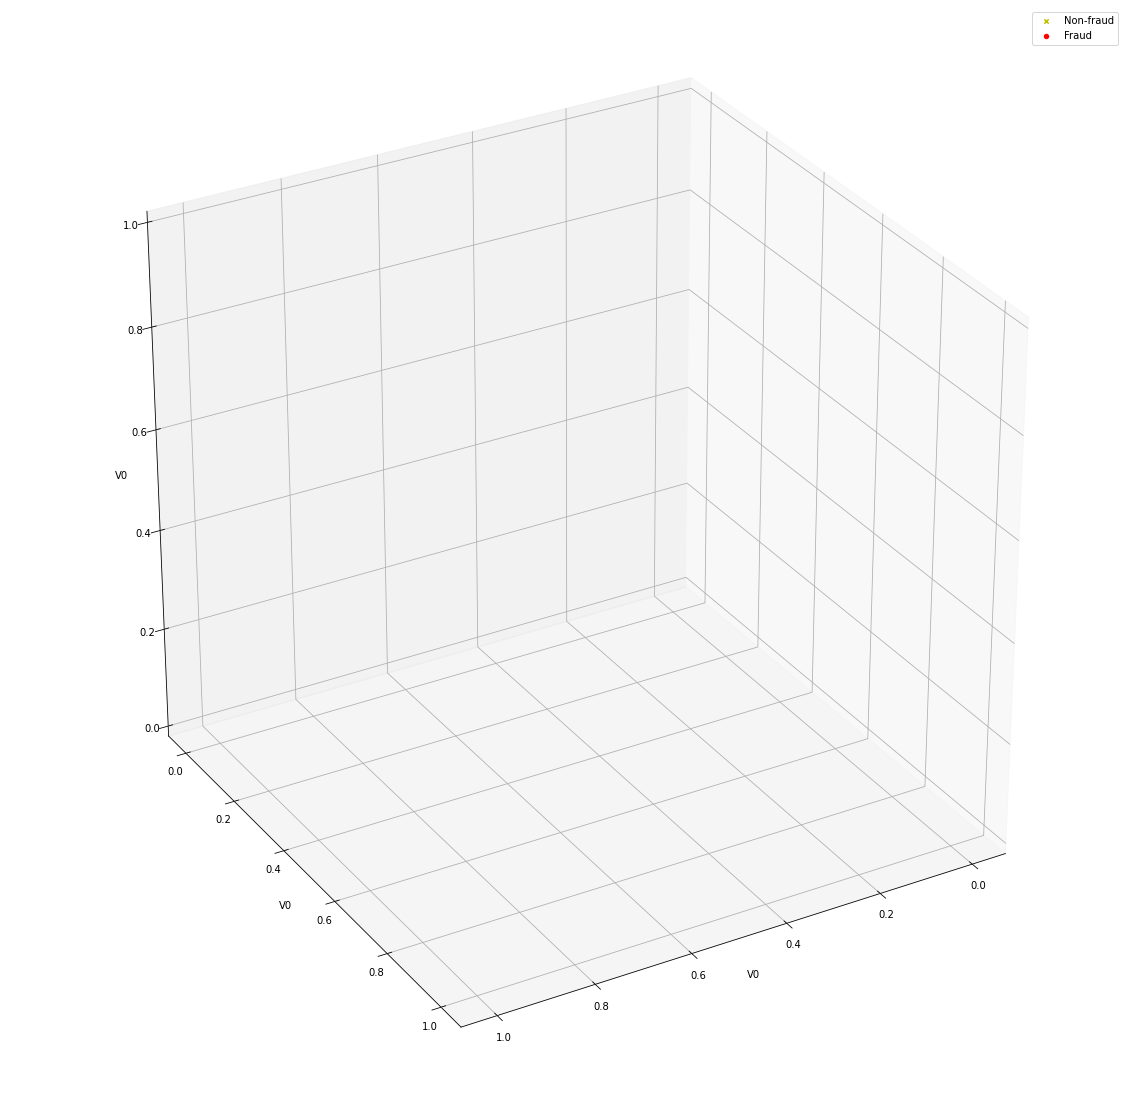

In [22]:
plot_3d(X_train, y_train, f1="V0", f2="V0", f3="V0", angle=60 ) # Replace V0 with desired features. Also, you can try different values of angle to see the plot from different angles

In [23]:
### YOUR CODE HERE ###

<function matplotlib.pyplot.show>

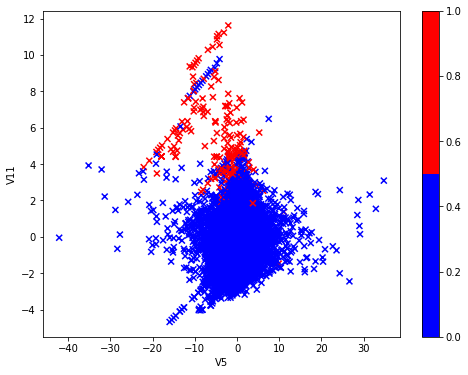

In [24]:
import matplotlib
rand_index=np.random.randint(0,28,size=2) # picking 2 features randomly 
two_features_picked=[features[rand_index[0]],features[rand_index[1]]]
plt.figure(figsize=(8,6))
plt.xlabel(two_features_picked[0])
plt.ylabel(two_features_picked[1])
colors = ['blue','red']
plt.scatter(X_train.loc[:,two_features_picked[0]],X_train.loc[:,two_features_picked[1]],marker="x",c=y_train.values,cmap=matplotlib.colors.ListedColormap(colors));
plt.colorbar()

plt.show


**It looks like only one component is required for Gaussian Mixture, as only one cluster is seen in the above plot.**

In [25]:
gm= GaussianMixture(n_components = 1, covariance_type = 'full', random_state=0)

#fit the datas , that is train the model
gm.fit(X_train.loc[:,two_features_picked])

#find the probabilities using the trained model
p_train=gm.score_samples(X_train.loc[:,two_features_picked])
p_val=gm.score_samples(X_val.loc[:,two_features_picked])

#find the auc scores and performance metrics
auc_score_t=roc_auc_score(y_train, -1 * p_train)
auc_score_v=roc_auc_score(y_val, -1 * p_val)

print('Auc score from training set : ',auc_score_t)
print('Auc score from validation set : ',auc_score_v)








Auc score from training set :  0.8959090155766345
Auc score from validation set :  0.8907836930058693


                 V5 & V11  V22 & V26  V5 & V1  V23 & V11
Train Auc Score  0.895909   0.532164  0.76476   0.902036
Val Auc Score    0.890784   0.525470  0.77636   0.896735
 
 
   V5 & V11  V22 & V26   V5 & V1  V23 & V11
0 -2.174785  -1.523070 -3.151549  -1.413642
1 -3.571623  -1.133127 -3.043534  -2.761428
2 -2.987848  -1.915656 -3.186054  -1.869097
3 -4.070756  -1.047871 -4.865700  -1.501789
4 -2.179599  -1.547801 -3.037756  -1.395591
maximum auc score is :  0.8967348423717008
corresponding pair of features :  V23 & V11
the list that contains max feature index: [22 10]
[['V5', 'V11'], ['V22', 'V26'], ['V5', 'V1'], ['V23', 'V11']]
features that gives maximum AUC score :  ['V23', 'V11']


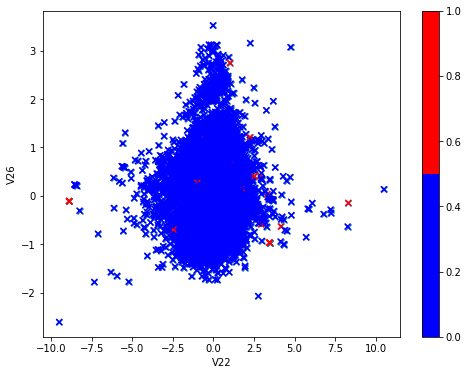

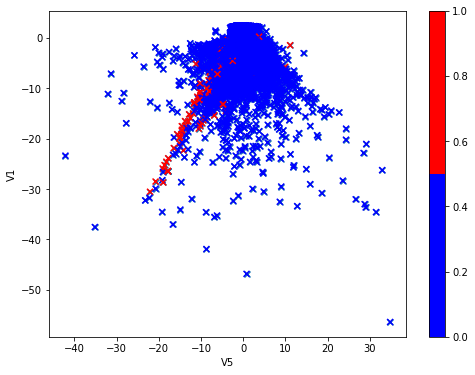

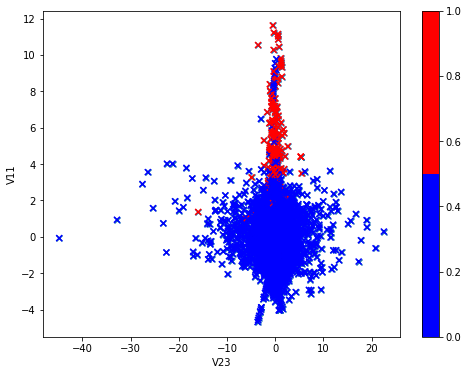

In [26]:
auc_score_tlist=[auc_score_t]
auc_score_vlist=[auc_score_v]
rand_index_list=[]
rand_index_list.append(rand_index)
feature_list=[]
feature_list.append(two_features_picked)

p_v_array2=np.zeros(len(X_val))
p_v_array2=np.vstack([p_v_array2,p_val])

p_t_array2=np.zeros(len(X_train))
p_t_array2=np.vstack([p_t_array2,p_train])

feature_picked=[two_features_picked[0] +' & '+ two_features_picked[1]] # list of strings that has pair of features name
for i in range(3): # It generates feature pair randomly
  rand_index=np.random.randint(0,28,size=2)
  #print(rand_index)
  if rand_index[0]==rand_index[1]: # jus to make sure that two features picked are not same feature which would give linear distribution 
    rand_index=np.random.randint(0,28,size=2)

  two_features_picked=[features[rand_index[0]],features[rand_index[1]]]
  

  #plot
  plt.figure(figsize=(8,6))
  plt.scatter(X_train.loc[:,two_features_picked[0]],X_train.loc[:,two_features_picked[1]],marker="x");
  plt.xlabel(two_features_picked[0])
  plt.ylabel(two_features_picked[1])
  plt.scatter(X_train.loc[:,two_features_picked[0]],X_train.loc[:,two_features_picked[1]],marker="x",c=y_train.values,cmap=matplotlib.colors.ListedColormap(colors));
  plt.colorbar()

  gm= GaussianMixture(n_components = 1, covariance_type = 'full', random_state=0)

#fit the datas , that is train the model
  gm.fit(X_train.loc[:,two_features_picked])

#find the probabilities using the trained model
  p_train=gm.score_samples(X_train.loc[:,two_features_picked])
  p_val=gm.score_samples(X_val.loc[:,two_features_picked])

#find the auc scores and performance metrics
  auc_score_t=roc_auc_score(y_train, -1 * p_train)
  auc_score_v=roc_auc_score(y_val, -1 * p_val)

  auc_score_tlist.append(auc_score_t)
  auc_score_vlist.append(auc_score_v)
  feature_picked.append(two_features_picked[0] +' & '+ two_features_picked[1])
  rand_index_list.append(rand_index)
  feature_list.append(two_features_picked)

  p_v_array2=np.vstack([p_v_array2,p_val])
  p_t_array2=np.vstack([p_t_array2,p_train])

 # print('Auc score from training set : ',auc_score_t)
 # print('Auc score from validation set : ',auc_score_v)

arr=[auc_score_tlist,auc_score_vlist]  
arr=np.array(arr)
#print(arr)
arr=pd.DataFrame(arr,columns=feature_picked,index=['Train Auc Score','Val Auc Score'])
print(arr)

p_v_array2=np.delete(p_v_array2,0,0)
p_v_array2=p_v_array2.T
P_v_table=pd.DataFrame(p_v_array2,columns=feature_picked) # Table that contains score_samples for each features for validation set
print(' ')
print(' ')
print(P_v_table.head(5))

p_t_array2=np.delete(p_t_array2,0,0)
p_t_array2=p_t_array2.T
P_t_table=pd.DataFrame(p_t_array2,columns=feature_picked) # Table that contains score_samples for each features for validation set

print('maximum auc score is : ',max(auc_score_vlist))
max_pair=feature_picked[auc_score_vlist.index(max(auc_score_vlist))]
print('corresponding pair of features : ',max_pair)

max_rand_index=rand_index_list[auc_score_vlist.index(max(auc_score_vlist))]
print('the list that contains max feature index:',max_rand_index)

print(feature_list)
max_feature_list=feature_list[auc_score_vlist.index(max(auc_score_vlist))]
print('features that gives maximum AUC score : ',max_feature_list)




In [27]:
# in search of Threshold
from sklearn.metrics import precision_score, recall_score, f1_score
th_range=np.linspace(min(P_v_table[max_pair].values),max(P_v_table[max_pair].values),100)
max_old=0
k=0
while True:
  #print(k)
  #print(th_range)
  k=k+1
  F1_Score_2=[]
  for i in th_range:
    f2=f1_score(y_val, P_v_table[max_pair].values<=i)
    F1_Score_2.append(f2)
  if abs(max(F1_Score_2)-max_old)<0.0001:
    break
  max_old=max(F1_Score_2)
  #print(max_old)
  #print(th_range[F1_Score_2.index(max(F1_Score_2))])
  th_range=np.linspace(th_range[F1_Score_2.index(max(F1_Score_2))-1],th_range[F1_Score_2.index(max(F1_Score_2))+1],50)
print('optimal threshold is :',th_range[F1_Score_2.index(max(F1_Score_2))], ' and the maximum F1 score is : ',max_old,' for the Feature pair : ',max_pair)

optimal threshold is : -15.33050421326713  and the maximum F1 score is :  0.14742014742014742  for the Feature pair :  V23 & V11


In [28]:
print(max_old)
print(th_range[F1_Score_2.index(max(F1_Score_2))])

0.14742014742014742
-15.33050421326713


Text(0.5, 1.0, 'Training plot')

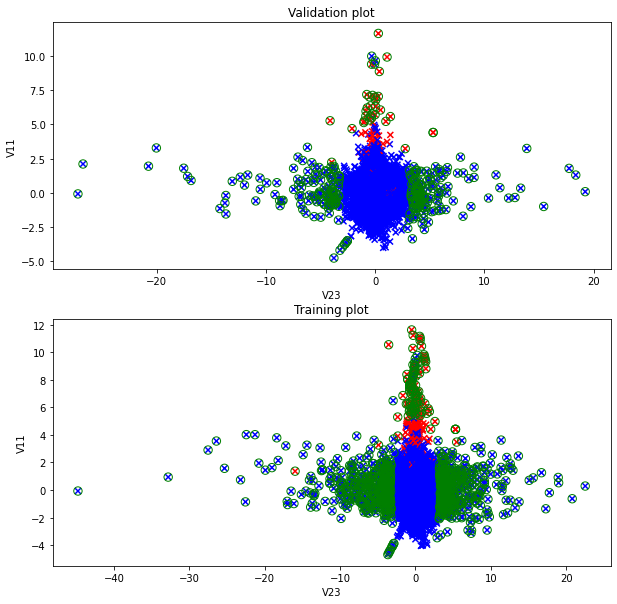

In [29]:
fig, ax = plt.subplots(2,figsize=(10,10))
#plt.figure(figsize=(10,10))
ax[0].scatter(X_val.loc[:,max_feature_list[0]],X_val.loc[:,max_feature_list[1]],c=y_val.values,cmap=matplotlib.colors.ListedColormap(colors),marker='x')
outliers = np.nonzero(P_v_table[max_pair].values<th_range[F1_Score_2.index(max(F1_Score_2))])[0]
ax[0].scatter(X_val.iloc[outliers,features.index(max_feature_list[0])],X_val.iloc[outliers,features.index(max_feature_list[1])],marker="o",facecolor= "none",edgecolor="g",s=70)
ax[0].set_xlabel(features[features.index(max_feature_list[0])])
ax[0].set_ylabel(features[features.index(max_feature_list[1])])
ax[0].set_title('Validation plot')

ax[1].scatter(X_train.loc[:,max_feature_list[0]],X_train.loc[:,max_feature_list[1]],c=y_train.values,cmap=matplotlib.colors.ListedColormap(colors),marker='x')
outliers = np.nonzero(P_t_table[max_pair].values<th_range[F1_Score_2.index(max(F1_Score_2))])[0]
ax[1].scatter(X_train.iloc[outliers,features.index(max_feature_list[0])],X_train.iloc[outliers,features.index(max_feature_list[1])],marker="o",facecolor= "none",edgecolor="g",s=70)
ax[1].set_xlabel(features[features.index(max_feature_list[0])])
ax[1].set_ylabel(features[features.index(max_feature_list[1])])
ax[1].set_title('Training plot')



Best three features from part two are : ['V10', 'V17', 'V14']


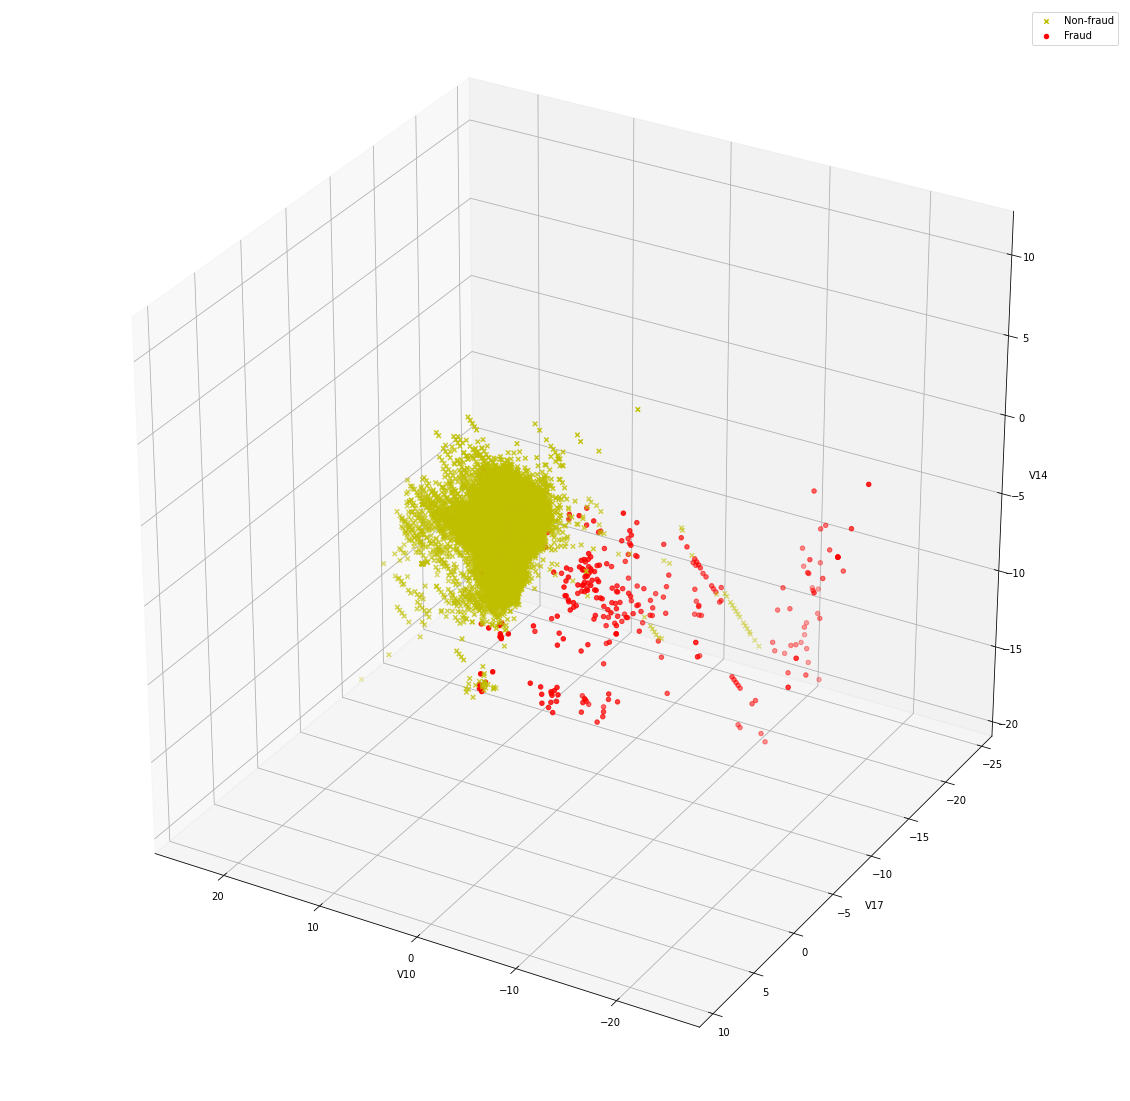

In [30]:
## Part 3 B starts here
print('Best three features from part two are :',best_three_features)
angle=120;
plot_3d(X_train , y_train, best_three_features[0], best_three_features[1], best_three_features[2], angle )

**By viewing the 3d plot from different angles, it seems the data points forms two clusters. Therefore two gaussian components is required.**

In [31]:
gm= GaussianMixture(n_components = 2, covariance_type = 'full', random_state=0) # taking 2 Gaussian components
gm.fit(X_train.loc[:,best_three_features])
#find the probabilities using the trained model
p_train=gm.score_samples(X_train.loc[:,best_three_features])
p_val=gm.score_samples(X_val.loc[:,best_three_features])

#find the auc scores and performance metrics
auc_score_t=roc_auc_score(y_train, -1 * p_train)
auc_score_v=roc_auc_score(y_val, -1 * p_val)

print('Auc score from training set : ',auc_score_t)
print('Auc score from validation set : ',auc_score_v)




Auc score from training set :  0.9569872894331424
Auc score from validation set :  0.9645215631099433


In [32]:
from sklearn.metrics import precision_score, recall_score, f1_score
th_range=np.linspace(min(p_val),max(p_val),100)
max_old=0
k=0
while True:
  #print(k)
  #print(th_range)
  k=k+1
  F1_Score_2=[]
  for i in th_range:
    f2=f1_score(y_val, p_val<=i)
    F1_Score_2.append(f2)
  if abs(max(F1_Score_2)-max_old)<0.0001:
    break
  max_old=max(F1_Score_2)
  #print(max_old)
  #print(th_range[F1_Score_2.index(max(F1_Score_2))])
  th_range=np.linspace(th_range[F1_Score_2.index(max(F1_Score_2))-1],th_range[F1_Score_2.index(max(F1_Score_2))+1],50)
print('The threshold is : ',th_range[F1_Score_2.index(max(F1_Score_2))],'F1 Score is : ',max_old)

The threshold is :  -16.38933096223023 F1 Score is :  0.5714285714285715


## **Part 4:  Two Gaussian model with single feature. [3 Marks]**
Now we will use two separate distributions for fraudulent and non-fraudulent transactions.
  1.  Fit a Gaussian distribution ($G_1$) on a feature of **non-fraudulent transactions** using ``sklearn.mixture.GaussianMixture`` when ``n_components=1``. **[0.5]**
  2. Fit another Gaussian distribution ($G_2$) on the same feature but for **fraudulent transactions** using ``sklearn.mixture.GaussianMixture`` when ``n_components=1``. **[0.5]**
  3. Compute the score samples ($S$) for both $G_1$ and $G_2$ on the **validation set** to get $S_1$ and $S_2$, respectively. **[0.5]**
  4. Find an optimal $c$ (a real number) that maximizes validation set F1 Score for a model such that if $S_1 < c \times S_2$, the transaction is classified as a fraud. For example, if $c=1$ we could say that if $S_2$ is greater than $S_1$, ($S_1$<$S_2$) then the transaction is a fraud (the transaction belongs to the $G_2$ distribution which represents fraudulent transactions). To start, consider $c$ in $[0,10]$ with steps of 0.1. You can change this window in your experiments if needed. **[0.5]**
  5. Repeat the steps above for all the features. What is the best F1 Score, Precision and Recall that you get for training and validation? Which feature and what c? Show your results in a table. **[0.5]**
  6. Can we report AUC for this model using the existing AUC function from sklearn? Why? **[0.5]**

**6. Existing AUC function takes only 1 set of score samples based on single Gaussian , here we have two gaussians with two different score samples set which cannot be passed to our existing auc function. Therefore we cannot report auc in this case** 

In [33]:
### YOUR CODE HERE ###

In [34]:
V=best_three_features[-2] # v17
print(V)
X_train_temp=X_train.copy() # creating non-fraudulant data set
X_train_temp['Class']=y_train
X_train_nf=X_train_temp.loc[X_train_temp['Class']==0,:] # creating non-fraudulant data set
X_train_f=X_train_temp.loc[X_train_temp['Class']==1,:] # creating fraudulant data set
print(X_train_nf.shape)
print(X_train_f.shape)


V17
(184801, 29)
(322, 29)


In [35]:
# creating and fitting Gaussian object
G1= GaussianMixture(n_components = 1, covariance_type = 'full', random_state=0)
G1.fit(X_train_nf[[V]])

G2=GaussianMixture(n_components = 1, covariance_type = 'full', random_state=0)
G2.fit(X_train_f[[V]])

# computing score samples or logrithmic probability for each sample
S1=G1.score_samples(X_val[[V]])
S2=G2.score_samples(X_val[[V]])

#F1 Score
#f1=f1_score(y_val, p_val<=i)
F1_score_list=[]
f = 0
C=[]
for c in np.arange(0,10,0.1):
  f=f1_score(y_val,S1<c*S2)
  C.append(c)
  F1_score_list.append(f)
print('Max F1Score is :',max(F1_score_list))
print('Corresponding C :',C[F1_score_list.index(max(F1_score_list))]) 


Max F1Score is : 0.6701570680628272
Corresponding C : 5.9


In [36]:
import warnings
warnings.filterwarnings('ignore')

In [37]:
max_F1_Score_V=[]
max_C_V=[]
max_pr_V=[]
max_re_V=[]

F1_Train=[]
max_pr_T=[]
max_re_T=[]
for V in features:
  G1= GaussianMixture(n_components = 1, covariance_type = 'full', random_state=0)
  G1.fit(X_train_nf[[V]])

  G2=GaussianMixture(n_components = 1, covariance_type = 'full', random_state=0)
  G2.fit(X_train_f[[V]])

# computing score samples or logrithmic probability for each sample
  S1_V=G1.score_samples(X_val[[V]]) # for validation
  S2_V=G2.score_samples(X_val[[V]])

  S1_T=G1.score_samples(X_train[[V]]) # for training
  S2_T=G2.score_samples(X_train[[V]])



#F1 Score
#f1=f1_score(y_val, p_val<=i)
  F1_score_list_V=[]
  C=[]
  for c in np.arange(0,10,0.1):
    f_V=f1_score(y_val,S1_V<c*S2_V) #Validation 
    C.append(c)
    F1_score_list_V.append(f_V)
  best_c=C[F1_score_list_V.index(max(F1_score_list_V))]
  best_F1_V=max(F1_score_list_V)
  p_V=precision_score(y_val,S1_V<best_c*S2_V)
  r_V=recall_score(y_val,S1_V<best_c*S2_V)
  f1_T=f1_score(y_train,S1_T<best_c*S2_T) 
  p_T=precision_score(y_train,S1_T<best_c*S2_T)
  r_T=recall_score(y_train,S1_T<best_c*S2_T)

  max_F1_Score_V.append(best_F1_V)
  max_C_V.append(C[F1_score_list_V.index(max(F1_score_list_V))])
  max_pr_V.append(p_V)
  max_re_V.append(r_V)
  max_pr_T.append(p_T)
  max_re_T.append(r_T)
  F1_Train.append(f1_T)






In [60]:
table=np.array([max_F1_Score_V,max_C_V,max_pr_V,max_re_V,F1_Train,max_pr_T,max_re_T])
table=pd.DataFrame(table.T,index=features,columns=['F1-Val','C-Val','Pr-Val','Re-Val','F1_Tr','Pr-Tr','Re-Tr'])
print(table)

       F1-Val  C-Val    Pr-Val    Re-Val     F1_Tr     Pr-Tr     Re-Tr
V1   0.152381    6.6  0.148148  0.156863  0.128440  0.126506  0.130435
V2   0.175439    5.9  0.833333  0.098039  0.127778  0.605263  0.071429
V3   0.312139    7.6  0.380282  0.264706  0.268714  0.351759  0.217391
V4   0.377358    4.2  0.363636  0.392157  0.355958  0.346041  0.366460
V5   0.193939    8.3  0.253968  0.156863  0.164706  0.223404  0.130435
V6   0.118812    1.9  0.079470  0.235294  0.100000  0.067164  0.195652
V7   0.236967    8.5  0.229358  0.245098  0.236364  0.230769  0.242236
V8   0.104167    6.9  0.080645  0.147059  0.063694  0.048387  0.093168
V9   0.448980    3.4  0.733333  0.323529  0.406321  0.743802  0.279503
V10  0.397590    6.8  0.515625  0.323529  0.383803  0.443089  0.338509
V11  0.627907    3.6  0.771429  0.529412  0.585789  0.662745  0.524845
V12  0.662857    4.4  0.794521  0.568627  0.673540  0.753846  0.608696
V13  0.005075    1.1  0.002574  0.176471  0.005560  0.002819  0.201863
V14  0

In [62]:
u=max(table['F1-Val'].values)
v=(table[table['F1-Val']==u].index.values)
print('The row corresponding to best F1 score is: ')
table.loc[v]

The row corresponding to best F1 score is: 


,F1-Val,C-Val,Pr-Val,Re-Val,F1_Tr,Pr-Tr,Re-Tr
V17,0.670157,5.9,0.719101,0.627451,0.625592,0.636656,0.614907


## **Part 5: Multivariate and Mixture of Gaussians Distribution [3 Marks]**
We now want to build an outlier detection model that performs well in terms of F1 score. To design your model, you can benefit from:

*   No restrictions on the number of features - use as few or as many as you want! (multivariate). 
*   To fit your model, you can take advantage of the Gaussian mixture model where you can set the number of components [help](https://scikit-learn.org/stable/modules/generated/sklearn.mixture.GaussianMixture.html) .
*   You can choose to fit your Gaussians on non-fraudulent transactions or to both classes. 


It is up to you how to design your model. Try at least 10 different models and report the AUC for both training and validation sets (if applicable) and the best F1 score, Precision and Recall (after tuning the threshold) for both training and validation sets for each model. What kind of model works better? How many features are best (and which ones)? How many Gaussians? How many components? Summarize your findings with tables or plots. **[3]**


**HINT !**

You might want to try a two gaussian model, multiple features, single component for valid transaction and multiple components for fraudulent ones! Why does it make sense to have multiple components for the fraudulent transactions?

In [39]:
### YOUR CODE HERE ###

In [40]:
def model_evaluation(gaussian_no,n,n_nf,n_fd,only_nonfraud_fit, X_train_f,y_train_f,X_val_f,y_val_f):
  # multiple Gaussian
  if gaussian_no >1:
    X_train_temp=X_train_f.copy() # creating non-fraudulant data set
    X_train_temp['Class']=y_train
    X_train_nf=X_train_temp.loc[X_train_temp['Class']==0,:] # creating non-fraudulant data set
    X_train_fd=X_train_temp.loc[X_train_temp['Class']==1,:] # creating fraudulant data set
    del X_train_nf['Class']
    del X_train_fd['Class']
    #print(len(X_train_nf))
    #print(len(X_train_fd))
    #print('multiple gaussian is being implemented')
    
    G1= GaussianMixture(n_components =n_nf, covariance_type = 'full', random_state=0)
    G1.fit(X_train_nf)

    G2=GaussianMixture(n_components = n_fd, covariance_type = 'full', random_state=0)
    G2.fit(X_train_fd)

# computing score samples or logrithmic probability for each sample
    S1_V=G1.score_samples(X_val_f) # for validation
    S2_V=G2.score_samples(X_val_f)

    S1_T=G1.score_samples(X_train_f) # for training
    S2_T=G2.score_samples(X_train_f)

    # optimal c
    F1_score_list_V=[]
    for c in np.arange(0,10,0.1):
      f_V=f1_score(y_val_f,S1_V<c*S2_V) #Validation 
      C.append(c)
      F1_score_list_V.append(f_V)
    best_c=C[F1_score_list_V.index(max(F1_score_list_V))]
    best_F1_V=max(F1_score_list_V)
    p_V=precision_score(y_val_f,S1_V<best_c*S2_V)
    r_V=recall_score(y_val_f,S1_V<best_c*S2_V)
    f1_T=f1_score(y_train_f,S1_T<best_c*S2_T) 
    p_T=precision_score(y_train_f,S1_T<best_c*S2_T)
    r_T=recall_score(y_train_f,S1_T<best_c*S2_T)

    #print(' The best C : ',best_c,'best F1 score is :', best_F1_V)

    return best_c,best_F1_V,'n/a',p_V,r_V,f1_T,'n/a',p_T,r_T
  
  #ONE Gaussian
  #print('one Gaussian is being implemented')
  if only_nonfraud_fit:
     X_train_temp=X_train_f.copy() # creating non-fraudulant data set
     X_train_temp['Class']=y_train
     X_train_nf=X_train_temp.loc[X_train_temp['Class']==0,:] # creating non-fraudulant data set
     X_train_fd=X_train_temp.loc[X_train_temp['Class']==1,:] # creating fraudulant data set
     del X_train_nf['Class']
     del X_train_fd['Class']
     #print(len(X_train_nf))
     #print('one gaussian non fradulent fit is being implemented')

     gm= GaussianMixture(n_components = n, covariance_type = 'full', random_state=0) # taking n Gaussian components
     gm.fit(X_train_nf)
  else:
    #print('one gaussian for fit both class')
    gm= GaussianMixture(n_components = n, covariance_type = 'full', random_state=0) # taking n Gaussian components
    gm.fit(X_train_f)
    
  #find the probabilities using the trained model
  #print('rest of code being executed for one gaussain')
  p_train=gm.score_samples(X_train_f)
  p_val=gm.score_samples(X_val_f)

# optimising threshold to get best f1 score
  th_range=np.linspace(min(p_val),max(p_val),100)
  max_old=0
  k=0
  while True:
    k=k+1
    F1_Score_2=[]
    for i in th_range:
      f2=f1_score(y_val_f, p_val<=i)
      F1_Score_2.append(f2)
    if abs(max(F1_Score_2)-max_old)<0.0001:
      break
    max_old=max(F1_Score_2)
  #print(max_old)
  #print(th_range[F1_Score_2.index(max(F1_Score_2))])
    th_range=np.linspace(th_range[F1_Score_2.index(max(F1_Score_2))-1],th_range[F1_Score_2.index(max(F1_Score_2))+1],50)
  #print('The threshold is : ',th_range[F1_Score_2.index(max(F1_Score_2))],'F1 Score is : ',max_old)

#find the auc scores and performance metrics
  best_f1_score_V=max(F1_Score_2)
  optimal_th=th_range[F1_Score_2.index(max(F1_Score_2))]
  auc_score_t=roc_auc_score(y_train_f, -1 * p_train)
  auc_score_V=roc_auc_score(y_val_f, -1 * p_val)

  pr_t=precision_score(y_train_f,p_train<optimal_th)
  re_t=recall_score(y_train_f,p_train<optimal_th)
  f1_t=f1_score(y_train_f,p_train<optimal_th)

  pr_v=precision_score(y_val_f,p_val<optimal_th)
  re_v=recall_score(y_val_f,p_val<optimal_th)

  return optimal_th,best_f1_score_V,auc_score_V,pr_v,re_v,f1_t,auc_score_t,pr_t,re_t







In [41]:
feature_chosen=best_three_features[-1]
Gaus_no=1;no_comp=1;no_comp_nonfraud=1;no_comp_fraud=1;only_nonfraud_fit=False;X_train_1=X_train[[feature_chosen]];y_train_1=y_train.copy();X_val_1=X_val[[feature_chosen]];y_val_1=y_val.copy()
optimal_threshold,best_f1_Valid,auc_Valid,pr_Valid,re_Valid,f1_Tr,auc_score_Tr,pr_Tr,re_Tr=model_evaluation(Gaus_no,no_comp,no_comp_nonfraud,no_comp_fraud,only_nonfraud_fit, X_train_1,y_train_1,X_val_1,y_val_1)
model_tables={'1Gaussian '+feature_chosen+'no_c= 1'+' fit=both class':[optimal_threshold,best_f1_Valid,auc_Valid,pr_Valid,re_Valid,f1_Tr,auc_score_Tr,pr_Tr,re_Tr]}

feature_chosen=best_three_features[-1]
Gaus_no=1;no_comp=2;no_comp_nonfraud=1;no_comp_fraud=1;only_nonfraud_fit=False;X_train_1=X_train[[feature_chosen]];y_train_1=y_train.copy();X_val_1=X_val[[feature_chosen]];y_val_1=y_val.copy()
optimal_threshold,best_f1_Valid,auc_Valid,pr_Valid,re_Valid,f1_Tr,auc_score_Tr,pr_Tr,re_Tr=model_evaluation(Gaus_no,no_comp,no_comp_nonfraud,no_comp_fraud,only_nonfraud_fit, X_train_1,y_train_1,X_val_1,y_val_1)
model_tables['1Gaussian '+feature_chosen+'no_c= 2'+' fit=both class']=[optimal_threshold,best_f1_Valid,auc_Valid,pr_Valid,re_Valid,f1_Tr,auc_score_Tr,pr_Tr,re_Tr]


feature_chosen=best_three_features[-1]
Gaus_no=1;no_comp=3;no_comp_nonfraud=1;no_comp_fraud=1;only_nonfraud_fit=False;X_train_1=X_train[[feature_chosen]];y_train_1=y_train.copy();X_val_1=X_val[[feature_chosen]];y_val_1=y_val.copy()
optimal_threshold,best_f1_Valid,auc_Valid,pr_Valid,re_Valid,f1_Tr,auc_score_Tr,pr_Tr,re_Tr=model_evaluation(Gaus_no,no_comp,no_comp_nonfraud,no_comp_fraud,only_nonfraud_fit, X_train_1,y_train_1,X_val_1,y_val_1)
model_tables['1Gaussian '+feature_chosen+'no_c= 3'+' fit=both class']=[optimal_threshold,best_f1_Valid,auc_Valid,pr_Valid,re_Valid,f1_Tr,auc_score_Tr,pr_Tr,re_Tr]


# two features 
feature_chosen=best_three_features[0:2]
Gaus_no=1;no_comp=1;no_comp_nonfraud=1;no_comp_fraud=3;only_nonfraud_fit=False;X_train_1=X_train[feature_chosen];y_train_1=y_train.copy();X_val_1=X_val[feature_chosen];y_val_1=y_val.copy()
optimal_threshold,best_f1_Valid,auc_Valid,pr_Valid,re_Valid,f1_Tr,auc_score_Tr,pr_Tr,re_Tr=model_evaluation(Gaus_no,no_comp,no_comp_nonfraud,no_comp_fraud,only_nonfraud_fit, X_train_1,y_train_1,X_val_1,y_val_1)
model_tables['1Gaussian '+feature_chosen[0]+'&'+feature_chosen[1]+'no_c= 1'+' fit=both class']=[optimal_threshold,best_f1_Valid,auc_Valid,pr_Valid,re_Valid,f1_Tr,auc_score_Tr,pr_Tr,re_Tr]


feature_chosen=best_three_features[0:2]
Gaus_no=1;no_comp=2;no_comp_nonfraud=1;no_comp_fraud=3;only_nonfraud_fit=False;X_train_1=X_train[feature_chosen];y_train_1=y_train.copy();X_val_1=X_val[feature_chosen];y_val_1=y_val.copy()
optimal_threshold,best_f1_Valid,auc_Valid,pr_Valid,re_Valid,f1_Tr,auc_score_Tr,pr_Tr,re_Tr=model_evaluation(Gaus_no,no_comp,no_comp_nonfraud,no_comp_fraud,only_nonfraud_fit, X_train_1,y_train_1,X_val_1,y_val_1)
model_tables['1Gaussian '+feature_chosen[0]+'&'+feature_chosen[1]+'no_c=2'+' fit=both class']=[optimal_threshold,best_f1_Valid,auc_Valid,pr_Valid,re_Valid,f1_Tr,auc_score_Tr,pr_Tr,re_Tr]


feature_chosen=best_three_features[0:2]
Gaus_no=1;no_comp=3;no_comp_nonfraud=1;no_comp_fraud=3;only_nonfraud_fit=False;X_train_1=X_train[feature_chosen];y_train_1=y_train.copy();X_val_1=X_val[feature_chosen];y_val_1=y_val.copy()
optimal_threshold,best_f1_Valid,auc_Valid,pr_Valid,re_Valid,f1_Tr,auc_score_Tr,pr_Tr,re_Tr=model_evaluation(Gaus_no,no_comp,no_comp_nonfraud,no_comp_fraud,only_nonfraud_fit, X_train_1,y_train_1,X_val_1,y_val_1)
model_tables['1Gaussian '+feature_chosen[0]+'&'+feature_chosen[1]+'no_c=3'+' fit=both class']=[optimal_threshold,best_f1_Valid,auc_Valid,pr_Valid,re_Valid,f1_Tr,auc_score_Tr,pr_Tr,re_Tr]

feature_chosen=best_three_features[0:2]
Gaus_no=2;no_comp=2;no_comp_nonfraud=1;no_comp_fraud=1;only_nonfraud_fit=False;X_train_1=X_train[feature_chosen];y_train_1=y_train.copy();X_val_1=X_val[feature_chosen];y_val_1=y_val.copy()
optimal_threshold,best_f1_Valid,auc_Valid,pr_Valid,re_Valid,f1_Tr,auc_score_Tr,pr_Tr,re_Tr=model_evaluation(Gaus_no,no_comp,no_comp_nonfraud,no_comp_fraud,only_nonfraud_fit, X_train_1,y_train_1,X_val_1,y_val_1)
model_tables['2Gaussian '+feature_chosen[0]+'&'+feature_chosen[1]+'no_comp_nonfraud=1 no_comp_fraud=1']=[optimal_threshold,best_f1_Valid,auc_Valid,pr_Valid,re_Valid,f1_Tr,auc_score_Tr,pr_Tr,re_Tr]


feature_chosen=best_three_features[0:2]
Gaus_no=2;no_comp=2;no_comp_nonfraud=1;no_comp_fraud=2;only_nonfraud_fit=False;X_train_1=X_train[feature_chosen];y_train_1=y_train.copy();X_val_1=X_val[feature_chosen];y_val_1=y_val.copy()
optimal_threshold,best_f1_Valid,auc_Valid,pr_Valid,re_Valid,f1_Tr,auc_score_Tr,pr_Tr,re_Tr=model_evaluation(Gaus_no,no_comp,no_comp_nonfraud,no_comp_fraud,only_nonfraud_fit, X_train_1,y_train_1,X_val_1,y_val_1)
model_tables['2Gaussian '+feature_chosen[0]+'&'+feature_chosen[1]+'no_comp_nonfraud=1 no_comp_fraud=2']=[optimal_threshold,best_f1_Valid,auc_Valid,pr_Valid,re_Valid,f1_Tr,auc_score_Tr,pr_Tr,re_Tr]

feature_chosen=best_three_features[0:2]
Gaus_no=2;no_comp=2;no_comp_nonfraud=1;no_comp_fraud=3;only_nonfraud_fit=False;X_train_1=X_train[feature_chosen];y_train_1=y_train.copy();X_val_1=X_val[feature_chosen];y_val_1=y_val.copy()
optimal_threshold,best_f1_Valid,auc_Valid,pr_Valid,re_Valid,f1_Tr,auc_score_Tr,pr_Tr,re_Tr=model_evaluation(Gaus_no,no_comp,no_comp_nonfraud,no_comp_fraud,only_nonfraud_fit, X_train_1,y_train_1,X_val_1,y_val_1)
model_tables['2Gaussian '+feature_chosen[0]+'&'+feature_chosen[1]+'no_comp_nonfraud=1 no_comp_fraud=3']=[optimal_threshold,best_f1_Valid,auc_Valid,pr_Valid,re_Valid,f1_Tr,auc_score_Tr,pr_Tr,re_Tr]

feature_chosen=best_three_features[0:2]
Gaus_no=2;no_comp=2;no_comp_nonfraud=1;no_comp_fraud=4;only_nonfraud_fit=False;X_train_1=X_train[feature_chosen];y_train_1=y_train.copy();X_val_1=X_val[feature_chosen];y_val_1=y_val.copy()
optimal_threshold,best_f1_Valid,auc_Valid,pr_Valid,re_Valid,f1_Tr,auc_score_Tr,pr_Tr,re_Tr=model_evaluation(Gaus_no,no_comp,no_comp_nonfraud,no_comp_fraud,only_nonfraud_fit, X_train_1,y_train_1,X_val_1,y_val_1)
model_tables['2Gaussian '+feature_chosen[0]+'&'+feature_chosen[1]+'no_comp_nonfraud=1 no_comp_fraud=4']=[optimal_threshold,best_f1_Valid,auc_Valid,pr_Valid,re_Valid,f1_Tr,auc_score_Tr,pr_Tr,re_Tr]

feature_chosen=best_three_features[0:2]
Gaus_no=2;no_comp=2;no_comp_nonfraud=1;no_comp_fraud=5;only_nonfraud_fit=False;X_train_1=X_train[feature_chosen];y_train_1=y_train.copy();X_val_1=X_val[feature_chosen];y_val_1=y_val.copy()
optimal_threshold,best_f1_Valid,auc_Valid,pr_Valid,re_Valid,f1_Tr,auc_score_Tr,pr_Tr,re_Tr=model_evaluation(Gaus_no,no_comp,no_comp_nonfraud,no_comp_fraud,only_nonfraud_fit, X_train_1,y_train_1,X_val_1,y_val_1)
model_tables['2Gaussian '+feature_chosen[0]+'&'+feature_chosen[1]+'no_comp_nonfraud=1 no_comp_fraud=5']=[optimal_threshold,best_f1_Valid,auc_Valid,pr_Valid,re_Valid,f1_Tr,auc_score_Tr,pr_Tr,re_Tr]

feature_chosen=best_three_features[0:2]
Gaus_no=2;no_comp=2;no_comp_nonfraud=1;no_comp_fraud=6;only_nonfraud_fit=False;X_train_1=X_train[feature_chosen];y_train_1=y_train.copy();X_val_1=X_val[feature_chosen];y_val_1=y_val.copy()
optimal_threshold,best_f1_Valid,auc_Valid,pr_Valid,re_Valid,f1_Tr,auc_score_Tr,pr_Tr,re_Tr=model_evaluation(Gaus_no,no_comp,no_comp_nonfraud,no_comp_fraud,only_nonfraud_fit, X_train_1,y_train_1,X_val_1,y_val_1)
model_tables['2Gaussian '+feature_chosen[0]+'&'+feature_chosen[1]+'no_comp_nonfraud=1 no_comp_fraud=6']=[optimal_threshold,best_f1_Valid,auc_Valid,pr_Valid,re_Valid,f1_Tr,auc_score_Tr,pr_Tr,re_Tr]

feature_chosen=best_three_features[0:2]
Gaus_no=2;no_comp=2;no_comp_nonfraud=1;no_comp_fraud=6;only_nonfraud_fit=False;X_train_1=X_train[feature_chosen];y_train_1=y_train.copy();X_val_1=X_val[feature_chosen];y_val_1=y_val.copy()
optimal_threshold,best_f1_Valid,auc_Valid,pr_Valid,re_Valid,f1_Tr,auc_score_Tr,pr_Tr,re_Tr=model_evaluation(Gaus_no,no_comp,no_comp_nonfraud,no_comp_fraud,only_nonfraud_fit, X_train_1,y_train_1,X_val_1,y_val_1)
model_tables['2Gaussian '+feature_chosen[0]+'&'+feature_chosen[1]+'no_comp_nonfraud=1 no_comp_fraud=6']=[optimal_threshold,best_f1_Valid,auc_Valid,pr_Valid,re_Valid,f1_Tr,auc_score_Tr,pr_Tr,re_Tr]

feature_chosen=best_three_features[0:2] # fitting only non_fraud single gaussian , no of component 1
Gaus_no=1;no_comp=1;no_comp_nonfraud=1;no_comp_fraud=6;only_nonfraud_fit=True;X_train_1=X_train[feature_chosen];y_train_1=y_train.copy();X_val_1=X_val[feature_chosen];y_val_1=y_val.copy()
optimal_threshold,best_f1_Valid,auc_Valid,pr_Valid,re_Valid,f1_Tr,auc_score_Tr,pr_Tr,re_Tr=model_evaluation(Gaus_no,no_comp,no_comp_nonfraud,no_comp_fraud,only_nonfraud_fit, X_train_1,y_train_1,X_val_1,y_val_1)
model_tables['1Gaussian '+feature_chosen[0]+'&'+feature_chosen[1]+'no_comp=1'+'fit= only nonfraud']=[optimal_threshold,best_f1_Valid,auc_Valid,pr_Valid,re_Valid,f1_Tr,auc_score_Tr,pr_Tr,re_Tr]

# two different features again:
feature_chosen=best_three_features[1:3] # single gaussian, component 1, fit both class
Gaus_no=1;no_comp=1;no_comp_nonfraud=1;no_comp_fraud=3;only_nonfraud_fit=False;X_train_1=X_train[feature_chosen];y_train_1=y_train.copy();X_val_1=X_val[feature_chosen];y_val_1=y_val.copy()
optimal_threshold,best_f1_Valid,auc_Valid,pr_Valid,re_Valid,f1_Tr,auc_score_Tr,pr_Tr,re_Tr=model_evaluation(Gaus_no,no_comp,no_comp_nonfraud,no_comp_fraud,only_nonfraud_fit, X_train_1,y_train_1,X_val_1,y_val_1)
model_tables['1Gaussian '+feature_chosen[0]+'&'+feature_chosen[1]+'no_comp=1'+'fit= both classes']=[optimal_threshold,best_f1_Valid,auc_Valid,pr_Valid,re_Valid,f1_Tr,auc_score_Tr,pr_Tr,re_Tr]

feature_chosen=best_three_features[1:3] # single gaussian, component 2, fit both class
Gaus_no=1;no_comp=2;no_comp_nonfraud=1;no_comp_fraud=3;only_nonfraud_fit=False;X_train_1=X_train[feature_chosen];y_train_1=y_train.copy();X_val_1=X_val[feature_chosen];y_val_1=y_val.copy()
optimal_threshold,best_f1_Valid,auc_Valid,pr_Valid,re_Valid,f1_Tr,auc_score_Tr,pr_Tr,re_Tr=model_evaluation(Gaus_no,no_comp,no_comp_nonfraud,no_comp_fraud,only_nonfraud_fit, X_train_1,y_train_1,X_val_1,y_val_1)
model_tables['1Gaussian '+feature_chosen[0]+'&'+feature_chosen[1]+'no_comp=2'+'fit= both classes']=[optimal_threshold,best_f1_Valid,auc_Valid,pr_Valid,re_Valid,f1_Tr,auc_score_Tr,pr_Tr,re_Tr]


feature_chosen=best_three_features[1:3] # single gaussian, component 3, fit both class
Gaus_no=1;no_comp=3;no_comp_nonfraud=1;no_comp_fraud=3;only_nonfraud_fit=False;X_train_1=X_train[feature_chosen];y_train_1=y_train.copy();X_val_1=X_val[feature_chosen];y_val_1=y_val.copy()
optimal_threshold,best_f1_Valid,auc_Valid,pr_Valid,re_Valid,f1_Tr,auc_score_Tr,pr_Tr,re_Tr=model_evaluation(Gaus_no,no_comp,no_comp_nonfraud,no_comp_fraud,only_nonfraud_fit, X_train_1,y_train_1,X_val_1,y_val_1)
model_tables['1Gaussian '+feature_chosen[0]+'&'+feature_chosen[1]+'no_comp=3'+'fit= both classes']=[optimal_threshold,best_f1_Valid,auc_Valid,pr_Valid,re_Valid,f1_Tr,auc_score_Tr,pr_Tr,re_Tr]


feature_chosen=best_three_features[1:3] # two gaussian, non_fraud compo 1
Gaus_no=2;no_comp=2;no_comp_nonfraud=1;no_comp_fraud=1;only_nonfraud_fit=False;X_train_1=X_train[feature_chosen];y_train_1=y_train.copy();X_val_1=X_val[feature_chosen];y_val_1=y_val.copy()
optimal_threshold,best_f1_Valid,auc_Valid,pr_Valid,re_Valid,f1_Tr,auc_score_Tr,pr_Tr,re_Tr=model_evaluation(Gaus_no,no_comp,no_comp_nonfraud,no_comp_fraud,only_nonfraud_fit, X_train_1,y_train_1,X_val_1,y_val_1)
model_tables['2Gaussian '+feature_chosen[0]+'&'+feature_chosen[1]+'no_comp_nonfraud=1;no_comp_fraud=1']=[optimal_threshold,best_f1_Valid,auc_Valid,pr_Valid,re_Valid,f1_Tr,auc_score_Tr,pr_Tr,re_Tr]


feature_chosen=best_three_features[1:3] # two gaussian, non_fraud compo 2
Gaus_no=2;no_comp=2;no_comp_nonfraud=1;no_comp_fraud=2;only_nonfraud_fit=False;X_train_1=X_train[feature_chosen];y_train_1=y_train.copy();X_val_1=X_val[feature_chosen];y_val_1=y_val.copy()
optimal_threshold,best_f1_Valid,auc_Valid,pr_Valid,re_Valid,f1_Tr,auc_score_Tr,pr_Tr,re_Tr=model_evaluation(Gaus_no,no_comp,no_comp_nonfraud,no_comp_fraud,only_nonfraud_fit, X_train_1,y_train_1,X_val_1,y_val_1)
model_tables['2Gaussian '+feature_chosen[0]+'&'+feature_chosen[1]+'no_comp_nonfraud=1;no_comp_fraud=2']=[optimal_threshold,best_f1_Valid,auc_Valid,pr_Valid,re_Valid,f1_Tr,auc_score_Tr,pr_Tr,re_Tr]

feature_chosen=best_three_features[1:3] # two gaussian, non_fraud compo 3
Gaus_no=2;no_comp=2;no_comp_nonfraud=1;no_comp_fraud=3;only_nonfraud_fit=False;X_train_1=X_train[feature_chosen];y_train_1=y_train.copy();X_val_1=X_val[feature_chosen];y_val_1=y_val.copy()
optimal_threshold,best_f1_Valid,auc_Valid,pr_Valid,re_Valid,f1_Tr,auc_score_Tr,pr_Tr,re_Tr=model_evaluation(Gaus_no,no_comp,no_comp_nonfraud,no_comp_fraud,only_nonfraud_fit, X_train_1,y_train_1,X_val_1,y_val_1)
model_tables['2Gaussian '+feature_chosen[0]+'&'+feature_chosen[1]+'no_comp_nonfraud=1;no_comp_fraud=3']=[optimal_threshold,best_f1_Valid,auc_Valid,pr_Valid,re_Valid,f1_Tr,auc_score_Tr,pr_Tr,re_Tr]

feature_chosen=best_three_features[1:3] # two gaussian, non_fraud compo 4
Gaus_no=2;no_comp=2;no_comp_nonfraud=1;no_comp_fraud=4;only_nonfraud_fit=False;X_train_1=X_train[feature_chosen];y_train_1=y_train.copy();X_val_1=X_val[feature_chosen];y_val_1=y_val.copy()
optimal_threshold,best_f1_Valid,auc_Valid,pr_Valid,re_Valid,f1_Tr,auc_score_Tr,pr_Tr,re_Tr=model_evaluation(Gaus_no,no_comp,no_comp_nonfraud,no_comp_fraud,only_nonfraud_fit, X_train_1,y_train_1,X_val_1,y_val_1)
model_tables['2Gaussian '+feature_chosen[0]+'&'+feature_chosen[1]+'no_comp_nonfraud=1;no_comp_fraud=4']=[optimal_threshold,best_f1_Valid,auc_Valid,pr_Valid,re_Valid,f1_Tr,auc_score_Tr,pr_Tr,re_Tr]

feature_chosen=best_three_features[1:3] # two gaussian, non_fraud compo 5
Gaus_no=2;no_comp=2;no_comp_nonfraud=1;no_comp_fraud=5;only_nonfraud_fit=False;X_train_1=X_train[feature_chosen];y_train_1=y_train.copy();X_val_1=X_val[feature_chosen];y_val_1=y_val.copy()
optimal_threshold,best_f1_Valid,auc_Valid,pr_Valid,re_Valid,f1_Tr,auc_score_Tr,pr_Tr,re_Tr=model_evaluation(Gaus_no,no_comp,no_comp_nonfraud,no_comp_fraud,only_nonfraud_fit, X_train_1,y_train_1,X_val_1,y_val_1)
model_tables['2Gaussian '+feature_chosen[0]+'&'+feature_chosen[1]+'no_comp_nonfraud=1;no_comp_fraud=5']=[optimal_threshold,best_f1_Valid,auc_Valid,pr_Valid,re_Valid,f1_Tr,auc_score_Tr,pr_Tr,re_Tr]

feature_chosen=best_three_features[1:3] # two gaussian, non_fraud compo 6
Gaus_no=2;no_comp=2;no_comp_nonfraud=1;no_comp_fraud=6;only_nonfraud_fit=False;X_train_1=X_train[feature_chosen];y_train_1=y_train.copy();X_val_1=X_val[feature_chosen];y_val_1=y_val.copy()
optimal_threshold,best_f1_Valid,auc_Valid,pr_Valid,re_Valid,f1_Tr,auc_score_Tr,pr_Tr,re_Tr=model_evaluation(Gaus_no,no_comp,no_comp_nonfraud,no_comp_fraud,only_nonfraud_fit, X_train_1,y_train_1,X_val_1,y_val_1)
model_tables['2Gaussian '+feature_chosen[0]+'&'+feature_chosen[1]+'no_comp_nonfraud=1;no_comp_fraud=6']=[optimal_threshold,best_f1_Valid,auc_Valid,pr_Valid,re_Valid,f1_Tr,auc_score_Tr,pr_Tr,re_Tr]

feature_chosen=best_three_features[1:3] # two gaussian, non_fraud compo 7
Gaus_no=2;no_comp=2;no_comp_nonfraud=1;no_comp_fraud=7;only_nonfraud_fit=False;X_train_1=X_train[feature_chosen];y_train_1=y_train.copy();X_val_1=X_val[feature_chosen];y_val_1=y_val.copy()
optimal_threshold,best_f1_Valid,auc_Valid,pr_Valid,re_Valid,f1_Tr,auc_score_Tr,pr_Tr,re_Tr=model_evaluation(Gaus_no,no_comp,no_comp_nonfraud,no_comp_fraud,only_nonfraud_fit, X_train_1,y_train_1,X_val_1,y_val_1)
model_tables['2Gaussian '+feature_chosen[0]+'&'+feature_chosen[1]+'no_comp_nonfraud=1;no_comp_fraud=7']=[optimal_threshold,best_f1_Valid,auc_Valid,pr_Valid,re_Valid,f1_Tr,auc_score_Tr,pr_Tr,re_Tr]

feature_chosen=best_three_features[1:3]  # fitting only non_fraud single gaussian , no of component 1
Gaus_no=1;no_comp=1;no_comp_nonfraud=1;no_comp_fraud=6;only_nonfraud_fit=True;X_train_1=X_train[feature_chosen];y_train_1=y_train.copy();X_val_1=X_val[feature_chosen];y_val_1=y_val.copy()
optimal_threshold,best_f1_Valid,auc_Valid,pr_Valid,re_Valid,f1_Tr,auc_score_Tr,pr_Tr,re_Tr=model_evaluation(Gaus_no,no_comp,no_comp_nonfraud,no_comp_fraud,only_nonfraud_fit, X_train_1,y_train_1,X_val_1,y_val_1)
model_tables['1Gaussian '+feature_chosen[0]+'&'+feature_chosen[1]+'no_comp=1'+'fit=non_fraud']=[optimal_threshold,best_f1_Valid,auc_Valid,pr_Valid,re_Valid,f1_Tr,auc_score_Tr,pr_Tr,re_Tr]

#three features
feature_chosen=best_three_features# single gaussian, component 1, fit both class
Gaus_no=1;no_comp=1;no_comp_nonfraud=1;no_comp_fraud=3;only_nonfraud_fit=False;X_train_1=X_train[feature_chosen];y_train_1=y_train.copy();X_val_1=X_val[feature_chosen];y_val_1=y_val.copy()
optimal_threshold,best_f1_Valid,auc_Valid,pr_Valid,re_Valid,f1_Tr,auc_score_Tr,pr_Tr,re_Tr=model_evaluation(Gaus_no,no_comp,no_comp_nonfraud,no_comp_fraud,only_nonfraud_fit, X_train_1,y_train_1,X_val_1,y_val_1)
model_tables['1Gaussian '+str(feature_chosen)+'no_comp=1 fit=both class']=[optimal_threshold,best_f1_Valid,auc_Valid,pr_Valid,re_Valid,f1_Tr,auc_score_Tr,pr_Tr,re_Tr]

feature_chosen=best_three_features# single gaussian, component 2, fit both class
Gaus_no=1;no_comp=2;no_comp_nonfraud=1;no_comp_fraud=3;only_nonfraud_fit=False;X_train_1=X_train[feature_chosen];y_train_1=y_train.copy();X_val_1=X_val[feature_chosen];y_val_1=y_val.copy()
optimal_threshold,best_f1_Valid,auc_Valid,pr_Valid,re_Valid,f1_Tr,auc_score_Tr,pr_Tr,re_Tr=model_evaluation(Gaus_no,no_comp,no_comp_nonfraud,no_comp_fraud,only_nonfraud_fit, X_train_1,y_train_1,X_val_1,y_val_1)
model_tables['1Gaussian '+str(feature_chosen)+'no_comp=2 fit=both class']=[optimal_threshold,best_f1_Valid,auc_Valid,pr_Valid,re_Valid,f1_Tr,auc_score_Tr,pr_Tr,re_Tr]

feature_chosen=best_three_features# single gaussian, component 3, fit both class
Gaus_no=1;no_comp=3;no_comp_nonfraud=1;no_comp_fraud=3;only_nonfraud_fit=False;X_train_1=X_train[feature_chosen];y_train_1=y_train.copy();X_val_1=X_val[feature_chosen];y_val_1=y_val.copy()
optimal_threshold,best_f1_Valid,auc_Valid,pr_Valid,re_Valid,f1_Tr,auc_score_Tr,pr_Tr,re_Tr=model_evaluation(Gaus_no,no_comp,no_comp_nonfraud,no_comp_fraud,only_nonfraud_fit, X_train_1,y_train_1,X_val_1,y_val_1)
model_tables['1Gaussian '+str(feature_chosen)+'no_comp=3 fit=both class']=[optimal_threshold,best_f1_Valid,auc_Valid,pr_Valid,re_Valid,f1_Tr,auc_score_Tr,pr_Tr,re_Tr]

feature_chosen=best_three_features# two gaussian, non_fraud compo 1
Gaus_no=2;no_comp=2;no_comp_nonfraud=1;no_comp_fraud=1;only_nonfraud_fit=False;X_train_1=X_train[feature_chosen];y_train_1=y_train.copy();X_val_1=X_val[feature_chosen];y_val_1=y_val.copy()
optimal_threshold,best_f1_Valid,auc_Valid,pr_Valid,re_Valid,f1_Tr,auc_score_Tr,pr_Tr,re_Tr=model_evaluation(Gaus_no,no_comp,no_comp_nonfraud,no_comp_fraud,only_nonfraud_fit, X_train_1,y_train_1,X_val_1,y_val_1)
model_tables['2Gaussian '+str(feature_chosen)+'no_comp_nonfraud=1;no_comp_fraud=1']=[optimal_threshold,best_f1_Valid,auc_Valid,pr_Valid,re_Valid,f1_Tr,auc_score_Tr,pr_Tr,re_Tr]

feature_chosen=best_three_features# two gaussian, non_fraud compo 2
Gaus_no=2;no_comp=2;no_comp_nonfraud=1;no_comp_fraud=2;only_nonfraud_fit=False;X_train_1=X_train[feature_chosen];y_train_1=y_train.copy();X_val_1=X_val[feature_chosen];y_val_1=y_val.copy()
optimal_threshold,best_f1_Valid,auc_Valid,pr_Valid,re_Valid,f1_Tr,auc_score_Tr,pr_Tr,re_Tr=model_evaluation(Gaus_no,no_comp,no_comp_nonfraud,no_comp_fraud,only_nonfraud_fit, X_train_1,y_train_1,X_val_1,y_val_1)
model_tables['2Gaussian '+str(feature_chosen)+'no_comp_nonfraud=1;no_comp_fraud=2']=[optimal_threshold,best_f1_Valid,auc_Valid,pr_Valid,re_Valid,f1_Tr,auc_score_Tr,pr_Tr,re_Tr]

feature_chosen=best_three_features # two gaussian, non_fraud compo 3
Gaus_no=2;no_comp=2;no_comp_nonfraud=1;no_comp_fraud=3;only_nonfraud_fit=False;X_train_1=X_train[feature_chosen];y_train_1=y_train.copy();X_val_1=X_val[feature_chosen];y_val_1=y_val.copy()
optimal_threshold,best_f1_Valid,auc_Valid,pr_Valid,re_Valid,f1_Tr,auc_score_Tr,pr_Tr,re_Tr=model_evaluation(Gaus_no,no_comp,no_comp_nonfraud,no_comp_fraud,only_nonfraud_fit, X_train_1,y_train_1,X_val_1,y_val_1)
model_tables['2Gaussian '+str(feature_chosen)+'no_comp_nonfraud=1;no_comp_fraud=3']=[optimal_threshold,best_f1_Valid,auc_Valid,pr_Valid,re_Valid,f1_Tr,auc_score_Tr,pr_Tr,re_Tr]

feature_chosen=best_three_features # two gaussian, non_fraud compo 4
Gaus_no=2;no_comp=2;no_comp_nonfraud=1;no_comp_fraud=4;only_nonfraud_fit=False;X_train_1=X_train[feature_chosen];y_train_1=y_train.copy();X_val_1=X_val[feature_chosen];y_val_1=y_val.copy()
optimal_threshold,best_f1_Valid,auc_Valid,pr_Valid,re_Valid,f1_Tr,auc_score_Tr,pr_Tr,re_Tr=model_evaluation(Gaus_no,no_comp,no_comp_nonfraud,no_comp_fraud,only_nonfraud_fit, X_train_1,y_train_1,X_val_1,y_val_1)
model_tables['2Gaussian '+str(feature_chosen)+'no_comp_nonfraud=1;no_comp_fraud=4']=[optimal_threshold,best_f1_Valid,auc_Valid,pr_Valid,re_Valid,f1_Tr,auc_score_Tr,pr_Tr,re_Tr]

feature_chosen=best_three_features # two gaussian, non_fraud compo 5
Gaus_no=2;no_comp=2;no_comp_nonfraud=1;no_comp_fraud=5;only_nonfraud_fit=False;X_train_1=X_train[feature_chosen];y_train_1=y_train.copy();X_val_1=X_val[feature_chosen];y_val_1=y_val.copy()
optimal_threshold,best_f1_Valid,auc_Valid,pr_Valid,re_Valid,f1_Tr,auc_score_Tr,pr_Tr,re_Tr=model_evaluation(Gaus_no,no_comp,no_comp_nonfraud,no_comp_fraud,only_nonfraud_fit, X_train_1,y_train_1,X_val_1,y_val_1)
model_tables['2Gaussian '+str(feature_chosen)+'no_comp_nonfraud=1;no_comp_fraud=5']=[optimal_threshold,best_f1_Valid,auc_Valid,pr_Valid,re_Valid,f1_Tr,auc_score_Tr,pr_Tr,re_Tr]

feature_chosen=best_three_features # two gaussian, non_fraud compo 6
Gaus_no=2;no_comp=2;no_comp_nonfraud=1;no_comp_fraud=6;only_nonfraud_fit=False;X_train_1=X_train[feature_chosen];y_train_1=y_train.copy();X_val_1=X_val[feature_chosen];y_val_1=y_val.copy()
optimal_threshold,best_f1_Valid,auc_Valid,pr_Valid,re_Valid,f1_Tr,auc_score_Tr,pr_Tr,re_Tr=model_evaluation(Gaus_no,no_comp,no_comp_nonfraud,no_comp_fraud,only_nonfraud_fit, X_train_1,y_train_1,X_val_1,y_val_1)
model_tables['2Gaussian '+str(feature_chosen)+'no_comp_nonfraud=1;no_comp_fraud=6']=[optimal_threshold,best_f1_Valid,auc_Valid,pr_Valid,re_Valid,f1_Tr,auc_score_Tr,pr_Tr,re_Tr]

feature_chosen=best_three_features # two gaussian, non_fraud compo 7
Gaus_no=2;no_comp=2;no_comp_nonfraud=1;no_comp_fraud=7;only_nonfraud_fit=False;X_train_1=X_train[feature_chosen];y_train_1=y_train.copy();X_val_1=X_val[feature_chosen];y_val_1=y_val.copy()
optimal_threshold,best_f1_Valid,auc_Valid,pr_Valid,re_Valid,f1_Tr,auc_score_Tr,pr_Tr,re_Tr=model_evaluation(Gaus_no,no_comp,no_comp_nonfraud,no_comp_fraud,only_nonfraud_fit, X_train_1,y_train_1,X_val_1,y_val_1)
model_tables['2Gaussian '+str(feature_chosen)+'no_comp_nonfraud=1;no_comp_fraud=7']=[optimal_threshold,best_f1_Valid,auc_Valid,pr_Valid,re_Valid,f1_Tr,auc_score_Tr,pr_Tr,re_Tr]

feature_chosen=best_three_features # fitting only non_fraud single gaussian , no of component 1
Gaus_no=1;no_comp=1;no_comp_nonfraud=1;no_comp_fraud=6;only_nonfraud_fit=True;X_train_1=X_train[feature_chosen];y_train_1=y_train.copy();X_val_1=X_val[feature_chosen];y_val_1=y_val.copy()
optimal_threshold,best_f1_Valid,auc_Valid,pr_Valid,re_Valid,f1_Tr,auc_score_Tr,pr_Tr,re_Tr=model_evaluation(Gaus_no,no_comp,no_comp_nonfraud,no_comp_fraud,only_nonfraud_fit, X_train_1,y_train_1,X_val_1,y_val_1)
model_tables['1Gaussian '+str(feature_chosen)+'no_comp=1 fit=non_fraud']=[optimal_threshold,best_f1_Valid,auc_Valid,pr_Valid,re_Valid,f1_Tr,auc_score_Tr,pr_Tr,re_Tr]

## 4 features
feature_chosen=best_three_features + ['V16']# single gaussian, component 1, fit both class
Gaus_no=1;no_comp=1;no_comp_nonfraud=1;no_comp_fraud=3;only_nonfraud_fit=False;X_train_1=X_train[feature_chosen];y_train_1=y_train.copy();X_val_1=X_val[feature_chosen];y_val_1=y_val.copy()
optimal_threshold,best_f1_Valid,auc_Valid,pr_Valid,re_Valid,f1_Tr,auc_score_Tr,pr_Tr,re_Tr=model_evaluation(Gaus_no,no_comp,no_comp_nonfraud,no_comp_fraud,only_nonfraud_fit, X_train_1,y_train_1,X_val_1,y_val_1)
model_tables['1Gaussian '+str(feature_chosen)+'no_comp=1 fit=both_class']=[optimal_threshold,best_f1_Valid,auc_Valid,pr_Valid,re_Valid,f1_Tr,auc_score_Tr,pr_Tr,re_Tr]

#feature_chosen=best_three_features + ['V16']# single gaussian, component 2, fit both class
Gaus_no=1;no_comp=2;no_comp_nonfraud=1;no_comp_fraud=3;only_nonfraud_fit=False;X_train_1=X_train[feature_chosen];y_train_1=y_train.copy();X_val_1=X_val[feature_chosen];y_val_1=y_val.copy()
optimal_threshold,best_f1_Valid,auc_Valid,pr_Valid,re_Valid,f1_Tr,auc_score_Tr,pr_Tr,re_Tr=model_evaluation(Gaus_no,no_comp,no_comp_nonfraud,no_comp_fraud,only_nonfraud_fit, X_train_1,y_train_1,X_val_1,y_val_1)
model_tables['1Gaussian '+str(feature_chosen)+'no_comp=2 fit=both_class']=[optimal_threshold,best_f1_Valid,auc_Valid,pr_Valid,re_Valid,f1_Tr,auc_score_Tr,pr_Tr,re_Tr]

#feature_chosen=best_three_features# single gaussian, component 3, fit both class
Gaus_no=1;no_comp=3;no_comp_nonfraud=1;no_comp_fraud=3;only_nonfraud_fit=False;X_train_1=X_train[feature_chosen];y_train_1=y_train.copy();X_val_1=X_val[feature_chosen];y_val_1=y_val.copy()
optimal_threshold,best_f1_Valid,auc_Valid,pr_Valid,re_Valid,f1_Tr,auc_score_Tr,pr_Tr,re_Tr=model_evaluation(Gaus_no,no_comp,no_comp_nonfraud,no_comp_fraud,only_nonfraud_fit, X_train_1,y_train_1,X_val_1,y_val_1)
model_tables['1Gaussian '+str(feature_chosen)+'no_comp=3 fit=both_class']=[optimal_threshold,best_f1_Valid,auc_Valid,pr_Valid,re_Valid,f1_Tr,auc_score_Tr,pr_Tr,re_Tr]

#feature_chosen=best_three_features# two gaussian, non_fraud compo 1
Gaus_no=2;no_comp=2;no_comp_nonfraud=1;no_comp_fraud=1;only_nonfraud_fit=False;X_train_1=X_train[feature_chosen];y_train_1=y_train.copy();X_val_1=X_val[feature_chosen];y_val_1=y_val.copy()
optimal_threshold,best_f1_Valid,auc_Valid,pr_Valid,re_Valid,f1_Tr,auc_score_Tr,pr_Tr,re_Tr=model_evaluation(Gaus_no,no_comp,no_comp_nonfraud,no_comp_fraud,only_nonfraud_fit, X_train_1,y_train_1,X_val_1,y_val_1)
model_tables['2Gaussian '+str(feature_chosen)+'no_comp_nonfraud=1;no_comp_fraud=1']=[optimal_threshold,best_f1_Valid,auc_Valid,pr_Valid,re_Valid,f1_Tr,auc_score_Tr,pr_Tr,re_Tr]

#feature_chosen=best_three_features# two gaussian, non_fraud compo 2
Gaus_no=2;no_comp=2;no_comp_nonfraud=1;no_comp_fraud=2;only_nonfraud_fit=False;X_train_1=X_train[feature_chosen];y_train_1=y_train.copy();X_val_1=X_val[feature_chosen];y_val_1=y_val.copy()
optimal_threshold,best_f1_Valid,auc_Valid,pr_Valid,re_Valid,f1_Tr,auc_score_Tr,pr_Tr,re_Tr=model_evaluation(Gaus_no,no_comp,no_comp_nonfraud,no_comp_fraud,only_nonfraud_fit, X_train_1,y_train_1,X_val_1,y_val_1)
model_tables['2Gaussian '+str(feature_chosen)+'no_comp_nonfraud=1;no_comp_fraud=2']=[optimal_threshold,best_f1_Valid,auc_Valid,pr_Valid,re_Valid,f1_Tr,auc_score_Tr,pr_Tr,re_Tr]
#feature_chosen=best_three_features # two gaussian, non_fraud compo 3
Gaus_no=2;no_comp=2;no_comp_nonfraud=1;no_comp_fraud=3;only_nonfraud_fit=False;X_train_1=X_train[feature_chosen];y_train_1=y_train.copy();X_val_1=X_val[feature_chosen];y_val_1=y_val.copy()
optimal_threshold,best_f1_Valid,auc_Valid,pr_Valid,re_Valid,f1_Tr,auc_score_Tr,pr_Tr,re_Tr=model_evaluation(Gaus_no,no_comp,no_comp_nonfraud,no_comp_fraud,only_nonfraud_fit, X_train_1,y_train_1,X_val_1,y_val_1)
model_tables['2Gaussian '+str(feature_chosen)+'no_comp_nonfraud=1;no_comp_fraud=3']=[optimal_threshold,best_f1_Valid,auc_Valid,pr_Valid,re_Valid,f1_Tr,auc_score_Tr,pr_Tr,re_Tr]

#feature_chosen=best_three_features # two gaussian, non_fraud compo 4
Gaus_no=2;no_comp=2;no_comp_nonfraud=1;no_comp_fraud=4;only_nonfraud_fit=False;X_train_1=X_train[feature_chosen];y_train_1=y_train.copy();X_val_1=X_val[feature_chosen];y_val_1=y_val.copy()
optimal_threshold,best_f1_Valid,auc_Valid,pr_Valid,re_Valid,f1_Tr,auc_score_Tr,pr_Tr,re_Tr=model_evaluation(Gaus_no,no_comp,no_comp_nonfraud,no_comp_fraud,only_nonfraud_fit, X_train_1,y_train_1,X_val_1,y_val_1)
model_tables['2Gaussian '+str(feature_chosen)+'no_comp_nonfraud=1;no_comp_fraud=4']=[optimal_threshold,best_f1_Valid,auc_Valid,pr_Valid,re_Valid,f1_Tr,auc_score_Tr,pr_Tr,re_Tr]

#feature_chosen=best_three_features # two gaussian, non_fraud compo 5
Gaus_no=2;no_comp=2;no_comp_nonfraud=1;no_comp_fraud=5;only_nonfraud_fit=False;X_train_1=X_train[feature_chosen];y_train_1=y_train.copy();X_val_1=X_val[feature_chosen];y_val_1=y_val.copy()
optimal_threshold,best_f1_Valid,auc_Valid,pr_Valid,re_Valid,f1_Tr,auc_score_Tr,pr_Tr,re_Tr=model_evaluation(Gaus_no,no_comp,no_comp_nonfraud,no_comp_fraud,only_nonfraud_fit, X_train_1,y_train_1,X_val_1,y_val_1)
model_tables['2Gaussian '+str(feature_chosen)+'no_comp_nonfraud=1;no_comp_fraud=5']=[optimal_threshold,best_f1_Valid,auc_Valid,pr_Valid,re_Valid,f1_Tr,auc_score_Tr,pr_Tr,re_Tr]


#feature_chosen=best_three_features # fitting only non_fraud single gaussian , no of component 1
Gaus_no=1;no_comp=1;no_comp_nonfraud=1;no_comp_fraud=6;only_nonfraud_fit=True;X_train_1=X_train[feature_chosen];y_train_1=y_train.copy();X_val_1=X_val[feature_chosen];y_val_1=y_val.copy()
optimal_threshold,best_f1_Valid,auc_Valid,pr_Valid,re_Valid,f1_Tr,auc_score_Tr,pr_Tr,re_Tr=model_evaluation(Gaus_no,no_comp,no_comp_nonfraud,no_comp_fraud,only_nonfraud_fit, X_train_1,y_train_1,X_val_1,y_val_1)
model_tables['1Gaussian '+str(feature_chosen)+'fit=non_fraud']=[optimal_threshold,best_f1_Valid,auc_Valid,pr_Valid,re_Valid,f1_Tr,auc_score_Tr,pr_Tr,re_Tr]

# 5 features chosen
feature_chosen=best_three_features + ['V16']+['V12']# single gaussian, component 1, fit both class
Gaus_no=1;no_comp=1;no_comp_nonfraud=1;no_comp_fraud=3;only_nonfraud_fit=False;X_train_1=X_train[feature_chosen];y_train_1=y_train.copy();X_val_1=X_val[feature_chosen];y_val_1=y_val.copy()
optimal_threshold,best_f1_Valid,auc_Valid,pr_Valid,re_Valid,f1_Tr,auc_score_Tr,pr_Tr,re_Tr=model_evaluation(Gaus_no,no_comp,no_comp_nonfraud,no_comp_fraud,only_nonfraud_fit, X_train_1,y_train_1,X_val_1,y_val_1)
model_tables['1Gaussian '+str(feature_chosen)+'n_comp=1 fit=both_class']=[optimal_threshold,best_f1_Valid,auc_Valid,pr_Valid,re_Valid,f1_Tr,auc_score_Tr,pr_Tr,re_Tr]

#feature_chosen=best_three_features + ['V16']# single gaussian, component 2, fit both class
Gaus_no=1;no_comp=2;no_comp_nonfraud=1;no_comp_fraud=3;only_nonfraud_fit=False;X_train_1=X_train[feature_chosen];y_train_1=y_train.copy();X_val_1=X_val[feature_chosen];y_val_1=y_val.copy()
optimal_threshold,best_f1_Valid,auc_Valid,pr_Valid,re_Valid,f1_Tr,auc_score_Tr,pr_Tr,re_Tr=model_evaluation(Gaus_no,no_comp,no_comp_nonfraud,no_comp_fraud,only_nonfraud_fit, X_train_1,y_train_1,X_val_1,y_val_1)
model_tables['1Gaussian '+str(feature_chosen)+'n_comp=2 fit=both class']=[optimal_threshold,best_f1_Valid,auc_Valid,pr_Valid,re_Valid,f1_Tr,auc_score_Tr,pr_Tr,re_Tr]

#feature_chosen=best_three_features# single gaussian, component 3, fit both class
Gaus_no=1;no_comp=3;no_comp_nonfraud=1;no_comp_fraud=3;only_nonfraud_fit=False;X_train_1=X_train[feature_chosen];y_train_1=y_train.copy();X_val_1=X_val[feature_chosen];y_val_1=y_val.copy()
optimal_threshold,best_f1_Valid,auc_Valid,pr_Valid,re_Valid,f1_Tr,auc_score_Tr,pr_Tr,re_Tr=model_evaluation(Gaus_no,no_comp,no_comp_nonfraud,no_comp_fraud,only_nonfraud_fit, X_train_1,y_train_1,X_val_1,y_val_1)
model_tables['1Gaussian '+str(feature_chosen)+'n_comp=3 fit=both class']=[optimal_threshold,best_f1_Valid,auc_Valid,pr_Valid,re_Valid,f1_Tr,auc_score_Tr,pr_Tr,re_Tr]

#feature_chosen=best_three_features# two gaussian, non_fraud compo 1
Gaus_no=2;no_comp=2;no_comp_nonfraud=1;no_comp_fraud=1;only_nonfraud_fit=False;X_train_1=X_train[feature_chosen];y_train_1=y_train.copy();X_val_1=X_val[feature_chosen];y_val_1=y_val.copy()
optimal_threshold,best_f1_Valid,auc_Valid,pr_Valid,re_Valid,f1_Tr,auc_score_Tr,pr_Tr,re_Tr=model_evaluation(Gaus_no,no_comp,no_comp_nonfraud,no_comp_fraud,only_nonfraud_fit, X_train_1,y_train_1,X_val_1,y_val_1)
model_tables['2Gaussian '+str(feature_chosen)+'no_comp_nonfraud=1;no_comp_fraud=1']=[optimal_threshold,best_f1_Valid,auc_Valid,pr_Valid,re_Valid,f1_Tr,auc_score_Tr,pr_Tr,re_Tr]

#feature_chosen=best_three_features# two gaussian, non_fraud compo 2
Gaus_no=2;no_comp=2;no_comp_nonfraud=1;no_comp_fraud=2;only_nonfraud_fit=False;X_train_1=X_train[feature_chosen];y_train_1=y_train.copy();X_val_1=X_val[feature_chosen];y_val_1=y_val.copy()
optimal_threshold,best_f1_Valid,auc_Valid,pr_Valid,re_Valid,f1_Tr,auc_score_Tr,pr_Tr,re_Tr=model_evaluation(Gaus_no,no_comp,no_comp_nonfraud,no_comp_fraud,only_nonfraud_fit, X_train_1,y_train_1,X_val_1,y_val_1)
model_tables['2Gaussian '+str(feature_chosen)+'no_comp_nonfraud=1;no_comp_fraud=2']=[optimal_threshold,best_f1_Valid,auc_Valid,pr_Valid,re_Valid,f1_Tr,auc_score_Tr,pr_Tr,re_Tr]

#feature_chosen=best_three_features # two gaussian, non_fraud compo 3
Gaus_no=2;no_comp=2;no_comp_nonfraud=1;no_comp_fraud=3;only_nonfraud_fit=False;X_train_1=X_train[feature_chosen];y_train_1=y_train.copy();X_val_1=X_val[feature_chosen];y_val_1=y_val.copy()
optimal_threshold,best_f1_Valid,auc_Valid,pr_Valid,re_Valid,f1_Tr,auc_score_Tr,pr_Tr,re_Tr=model_evaluation(Gaus_no,no_comp,no_comp_nonfraud,no_comp_fraud,only_nonfraud_fit, X_train_1,y_train_1,X_val_1,y_val_1)
model_tables['2Gaussian '+str(feature_chosen)+'no_comp_nonfraud=1;no_comp_fraud=3']=[optimal_threshold,best_f1_Valid,auc_Valid,pr_Valid,re_Valid,f1_Tr,auc_score_Tr,pr_Tr,re_Tr]

#feature_chosen=best_three_features # two gaussian, non_fraud compo 4
Gaus_no=2;no_comp=2;no_comp_nonfraud=1;no_comp_fraud=4;only_nonfraud_fit=False;X_train_1=X_train[feature_chosen];y_train_1=y_train.copy();X_val_1=X_val[feature_chosen];y_val_1=y_val.copy()
optimal_threshold,best_f1_Valid,auc_Valid,pr_Valid,re_Valid,f1_Tr,auc_score_Tr,pr_Tr,re_Tr=model_evaluation(Gaus_no,no_comp,no_comp_nonfraud,no_comp_fraud,only_nonfraud_fit, X_train_1,y_train_1,X_val_1,y_val_1)
model_tables['2Gaussian '+str(feature_chosen)+'no_comp_nonfraud=1;no_comp_fraud=4']=[optimal_threshold,best_f1_Valid,auc_Valid,pr_Valid,re_Valid,f1_Tr,auc_score_Tr,pr_Tr,re_Tr]

#feature_chosen=best_three_features # fitting only non_fraud single gaussian , no of component 1
Gaus_no=1;no_comp=1;no_comp_nonfraud=1;no_comp_fraud=6;only_nonfraud_fit=True;X_train_1=X_train[feature_chosen];y_train_1=y_train.copy();X_val_1=X_val[feature_chosen];y_val_1=y_val.copy()
optimal_threshold,best_f1_Valid,auc_Valid,pr_Valid,re_Valid,f1_Tr,auc_score_Tr,pr_Tr,re_Tr=model_evaluation(Gaus_no,no_comp,no_comp_nonfraud,no_comp_fraud,only_nonfraud_fit, X_train_1,y_train_1,X_val_1,y_val_1)
model_tables['1Gaussian '+str(feature_chosen)+'fit=non_fraud']=[optimal_threshold,best_f1_Valid,auc_Valid,pr_Valid,re_Valid,f1_Tr,auc_score_Tr,pr_Tr,re_Tr]


# 6 features chosen
feature_chosen=best_three_features + ['V16']+['V12']+['V4']# single gaussian, component 1, fit both class
Gaus_no=1;no_comp=1;no_comp_nonfraud=1;no_comp_fraud=3;only_nonfraud_fit=False;X_train_1=X_train[feature_chosen];y_train_1=y_train.copy();X_val_1=X_val[feature_chosen];y_val_1=y_val.copy()
optimal_threshold,best_f1_Valid,auc_Valid,pr_Valid,re_Valid,f1_Tr,auc_score_Tr,pr_Tr,re_Tr=model_evaluation(Gaus_no,no_comp,no_comp_nonfraud,no_comp_fraud,only_nonfraud_fit, X_train_1,y_train_1,X_val_1,y_val_1)
model_tables['1Gaussian '+str(feature_chosen)+'no_comp=1 fit=both class']=[optimal_threshold,best_f1_Valid,auc_Valid,pr_Valid,re_Valid,f1_Tr,auc_score_Tr,pr_Tr,re_Tr]

#feature_chosen=best_three_features + ['V16']# single gaussian, component 2, fit both class
Gaus_no=1;no_comp=2;no_comp_nonfraud=1;no_comp_fraud=3;only_nonfraud_fit=False;X_train_1=X_train[feature_chosen];y_train_1=y_train.copy();X_val_1=X_val[feature_chosen];y_val_1=y_val.copy()
optimal_threshold,best_f1_Valid,auc_Valid,pr_Valid,re_Valid,f1_Tr,auc_score_Tr,pr_Tr,re_Tr=model_evaluation(Gaus_no,no_comp,no_comp_nonfraud,no_comp_fraud,only_nonfraud_fit, X_train_1,y_train_1,X_val_1,y_val_1)
model_tables['1Gaussian '+str(feature_chosen)+'no_comp=2 fit=both class']=[optimal_threshold,best_f1_Valid,auc_Valid,pr_Valid,re_Valid,f1_Tr,auc_score_Tr,pr_Tr,re_Tr]

#feature_chosen=best_three_features# single gaussian, component 3, fit both class
Gaus_no=1;no_comp=3;no_comp_nonfraud=1;no_comp_fraud=3;only_nonfraud_fit=False;X_train_1=X_train[feature_chosen];y_train_1=y_train.copy();X_val_1=X_val[feature_chosen];y_val_1=y_val.copy()
optimal_threshold,best_f1_Valid,auc_Valid,pr_Valid,re_Valid,f1_Tr,auc_score_Tr,pr_Tr,re_Tr=model_evaluation(Gaus_no,no_comp,no_comp_nonfraud,no_comp_fraud,only_nonfraud_fit, X_train_1,y_train_1,X_val_1,y_val_1)
model_tables['1Gaussian '+str(feature_chosen)+'no_comp=3 fit=both class']=[optimal_threshold,best_f1_Valid,auc_Valid,pr_Valid,re_Valid,f1_Tr,auc_score_Tr,pr_Tr,re_Tr]

#feature_chosen=best_three_features# two gaussian, non_fraud compo 1
Gaus_no=2;no_comp=2;no_comp_nonfraud=1;no_comp_fraud=1;only_nonfraud_fit=False;X_train_1=X_train[feature_chosen];y_train_1=y_train.copy();X_val_1=X_val[feature_chosen];y_val_1=y_val.copy()
optimal_threshold,best_f1_Valid,auc_Valid,pr_Valid,re_Valid,f1_Tr,auc_score_Tr,pr_Tr,re_Tr=model_evaluation(Gaus_no,no_comp,no_comp_nonfraud,no_comp_fraud,only_nonfraud_fit, X_train_1,y_train_1,X_val_1,y_val_1)
model_tables['2Gaussian '+str(feature_chosen)+' no_comp_nonfraud=1;no_comp_fraud=1 ']=[optimal_threshold,best_f1_Valid,auc_Valid,pr_Valid,re_Valid,f1_Tr,auc_score_Tr,pr_Tr,re_Tr]

#feature_chosen=best_three_features# two gaussian, non_fraud compo 2
Gaus_no=2;no_comp=2;no_comp_nonfraud=1;no_comp_fraud=2;only_nonfraud_fit=False;X_train_1=X_train[feature_chosen];y_train_1=y_train.copy();X_val_1=X_val[feature_chosen];y_val_1=y_val.copy()
optimal_threshold,best_f1_Valid,auc_Valid,pr_Valid,re_Valid,f1_Tr,auc_score_Tr,pr_Tr,re_Tr=model_evaluation(Gaus_no,no_comp,no_comp_nonfraud,no_comp_fraud,only_nonfraud_fit, X_train_1,y_train_1,X_val_1,y_val_1)
model_tables['2Gaussian '+str(feature_chosen)+' no_comp_nonfraud=1;no_comp_fraud=2 ']=[optimal_threshold,best_f1_Valid,auc_Valid,pr_Valid,re_Valid,f1_Tr,auc_score_Tr,pr_Tr,re_Tr]

#feature_chosen=best_three_features # two gaussian, non_fraud compo 3
Gaus_no=2;no_comp=2;no_comp_nonfraud=1;no_comp_fraud=3;only_nonfraud_fit=False;X_train_1=X_train[feature_chosen];y_train_1=y_train.copy();X_val_1=X_val[feature_chosen];y_val_1=y_val.copy()
optimal_threshold,best_f1_Valid,auc_Valid,pr_Valid,re_Valid,f1_Tr,auc_score_Tr,pr_Tr,re_Tr=model_evaluation(Gaus_no,no_comp,no_comp_nonfraud,no_comp_fraud,only_nonfraud_fit, X_train_1,y_train_1,X_val_1,y_val_1)
model_tables['2Gaussian '+str(feature_chosen)+' no_comp_nonfraud=1;no_comp_fraud=3']=[optimal_threshold,best_f1_Valid,auc_Valid,pr_Valid,re_Valid,f1_Tr,auc_score_Tr,pr_Tr,re_Tr]

#feature_chosen=best_three_features # two gaussian, non_fraud compo 4
Gaus_no=2;no_comp=2;no_comp_nonfraud=1;no_comp_fraud=4;only_nonfraud_fit=False;X_train_1=X_train[feature_chosen];y_train_1=y_train.copy();X_val_1=X_val[feature_chosen];y_val_1=y_val.copy()
optimal_threshold,best_f1_Valid,auc_Valid,pr_Valid,re_Valid,f1_Tr,auc_score_Tr,pr_Tr,re_Tr=model_evaluation(Gaus_no,no_comp,no_comp_nonfraud,no_comp_fraud,only_nonfraud_fit, X_train_1,y_train_1,X_val_1,y_val_1)
model_tables['2Gaussian '+str(feature_chosen)+' no_comp_nonfraud=1;no_comp_fraud=4 ']=[optimal_threshold,best_f1_Valid,auc_Valid,pr_Valid,re_Valid,f1_Tr,auc_score_Tr,pr_Tr,re_Tr]

#feature_chosen=best_three_features # fitting only non_fraud single gaussian , no of component 1
Gaus_no=1;no_comp=1;no_comp_nonfraud=1;no_comp_fraud=6;only_nonfraud_fit=True;X_train_1=X_train[feature_chosen];y_train_1=y_train.copy();X_val_1=X_val[feature_chosen];y_val_1=y_val.copy()
optimal_threshold,best_f1_Valid,auc_Valid,pr_Valid,re_Valid,f1_Tr,auc_score_Tr,pr_Tr,re_Tr=model_evaluation(Gaus_no,no_comp,no_comp_nonfraud,no_comp_fraud,only_nonfraud_fit, X_train_1,y_train_1,X_val_1,y_val_1)
model_tables['1Gaussian '+str(feature_chosen)+' fit= non_fraud ']=[optimal_threshold,best_f1_Valid,auc_Valid,pr_Valid,re_Valid,f1_Tr,auc_score_Tr,pr_Tr,re_Tr]



In [42]:
# feature chosen 7
feature_chosen=best_three_features + ['V16']+['V12']+['V4']+['V7']# single gaussian, component 1, fit both class
Gaus_no=1;no_comp=1;no_comp_nonfraud=1;no_comp_fraud=3;only_nonfraud_fit=False;X_train_1=X_train[feature_chosen];y_train_1=y_train.copy();X_val_1=X_val[feature_chosen];y_val_1=y_val.copy()
optimal_threshold,best_f1_Valid,auc_Valid,pr_Valid,re_Valid,f1_Tr,auc_score_Tr,pr_Tr,re_Tr=model_evaluation(Gaus_no,no_comp,no_comp_nonfraud,no_comp_fraud,only_nonfraud_fit, X_train_1,y_train_1,X_val_1,y_val_1)
model_tables['1Gaussian '+str(feature_chosen)+' no_comp=1 fit=both_ class ']=[optimal_threshold,best_f1_Valid,auc_Valid,pr_Valid,re_Valid,f1_Tr,auc_score_Tr,pr_Tr,re_Tr]

#feature_chosen=best_three_features + ['V16']# single gaussian, component 2, fit both class
Gaus_no=1;no_comp=2;no_comp_nonfraud=1;no_comp_fraud=3;only_nonfraud_fit=False;X_train_1=X_train[feature_chosen];y_train_1=y_train.copy();X_val_1=X_val[feature_chosen];y_val_1=y_val.copy()
optimal_threshold,best_f1_Valid,auc_Valid,pr_Valid,re_Valid,f1_Tr,auc_score_Tr,pr_Tr,re_Tr=model_evaluation(Gaus_no,no_comp,no_comp_nonfraud,no_comp_fraud,only_nonfraud_fit, X_train_1,y_train_1,X_val_1,y_val_1)
model_tables['1Gaussian '+str(feature_chosen)+' no_comp=2 fit=both_ class ']=[optimal_threshold,best_f1_Valid,auc_Valid,pr_Valid,re_Valid,f1_Tr,auc_score_Tr,pr_Tr,re_Tr]

#feature_chosen=best_three_features# single gaussian, component 3, fit both class
Gaus_no=1;no_comp=3;no_comp_nonfraud=1;no_comp_fraud=3;only_nonfraud_fit=False;X_train_1=X_train[feature_chosen];y_train_1=y_train.copy();X_val_1=X_val[feature_chosen];y_val_1=y_val.copy()
optimal_threshold,best_f1_Valid,auc_Valid,pr_Valid,re_Valid,f1_Tr,auc_score_Tr,pr_Tr,re_Tr=model_evaluation(Gaus_no,no_comp,no_comp_nonfraud,no_comp_fraud,only_nonfraud_fit, X_train_1,y_train_1,X_val_1,y_val_1)
model_tables['1Gaussian '+str(feature_chosen)+' no_comp=3 fit=both_ class ']=[optimal_threshold,best_f1_Valid,auc_Valid,pr_Valid,re_Valid,f1_Tr,auc_score_Tr,pr_Tr,re_Tr]

#feature_chosen=best_three_features# two gaussian, non_fraud compo 1
Gaus_no=2;no_comp=2;no_comp_nonfraud=1;no_comp_fraud=1;only_nonfraud_fit=False;X_train_1=X_train[feature_chosen];y_train_1=y_train.copy();X_val_1=X_val[feature_chosen];y_val_1=y_val.copy()
optimal_threshold,best_f1_Valid,auc_Valid,pr_Valid,re_Valid,f1_Tr,auc_score_Tr,pr_Tr,re_Tr=model_evaluation(Gaus_no,no_comp,no_comp_nonfraud,no_comp_fraud,only_nonfraud_fit, X_train_1,y_train_1,X_val_1,y_val_1)
model_tables['2Gaussian '+str(feature_chosen)+'no_comp_nonfraud=1;no_comp_fraud=1']=[optimal_threshold,best_f1_Valid,auc_Valid,pr_Valid,re_Valid,f1_Tr,auc_score_Tr,pr_Tr,re_Tr]

#feature_chosen=best_three_features# two gaussian, non_fraud compo 2
Gaus_no=2;no_comp=2;no_comp_nonfraud=1;no_comp_fraud=2;only_nonfraud_fit=False;X_train_1=X_train[feature_chosen];y_train_1=y_train.copy();X_val_1=X_val[feature_chosen];y_val_1=y_val.copy()
optimal_threshold,best_f1_Valid,auc_Valid,pr_Valid,re_Valid,f1_Tr,auc_score_Tr,pr_Tr,re_Tr=model_evaluation(Gaus_no,no_comp,no_comp_nonfraud,no_comp_fraud,only_nonfraud_fit, X_train_1,y_train_1,X_val_1,y_val_1)
model_tables['2Gaussian '+str(feature_chosen)+'no_comp_nonfraud=1;no_comp_fraud=2']=[optimal_threshold,best_f1_Valid,auc_Valid,pr_Valid,re_Valid,f1_Tr,auc_score_Tr,pr_Tr,re_Tr]

#feature_chosen=best_three_features # two gaussian, non_fraud compo 3
Gaus_no=2;no_comp=2;no_comp_nonfraud=1;no_comp_fraud=3;only_nonfraud_fit=False;X_train_1=X_train[feature_chosen];y_train_1=y_train.copy();X_val_1=X_val[feature_chosen];y_val_1=y_val.copy()
optimal_threshold,best_f1_Valid,auc_Valid,pr_Valid,re_Valid,f1_Tr,auc_score_Tr,pr_Tr,re_Tr=model_evaluation(Gaus_no,no_comp,no_comp_nonfraud,no_comp_fraud,only_nonfraud_fit, X_train_1,y_train_1,X_val_1,y_val_1)
model_tables['2Gaussian '+str(feature_chosen)+'no_comp_nonfraud=1;no_comp_fraud=3']=[optimal_threshold,best_f1_Valid,auc_Valid,pr_Valid,re_Valid,f1_Tr,auc_score_Tr,pr_Tr,re_Tr]

#feature_chosen=best_three_features # fitting only non_fraud single gaussian , no of component 1
Gaus_no=1;no_comp=1;no_comp_nonfraud=1;no_comp_fraud=6;only_nonfraud_fit=True;X_train_1=X_train[feature_chosen];y_train_1=y_train.copy();X_val_1=X_val[feature_chosen];y_val_1=y_val.copy()
optimal_threshold,best_f1_Valid,auc_Valid,pr_Valid,re_Valid,f1_Tr,auc_score_Tr,pr_Tr,re_Tr=model_evaluation(Gaus_no,no_comp,no_comp_nonfraud,no_comp_fraud,only_nonfraud_fit, X_train_1,y_train_1,X_val_1,y_val_1)
model_tables['1Gaussian '+str(feature_chosen)+'fit_non_fraud']=[optimal_threshold,best_f1_Valid,auc_Valid,pr_Valid,re_Valid,f1_Tr,auc_score_Tr,pr_Tr,re_Tr]


In [43]:
# feature chosen 8 
feature_chosen=best_three_features + ['V16']+['V12']+['V4']+['V7']+['V11']# single gaussian, component 1, fit both class# single gaussian, component 1, fit both class
Gaus_no=1;no_comp=1;no_comp_nonfraud=1;no_comp_fraud=3;only_nonfraud_fit=False;X_train_1=X_train[feature_chosen];y_train_1=y_train.copy();X_val_1=X_val[feature_chosen];y_val_1=y_val.copy()
optimal_threshold,best_f1_Valid,auc_Valid,pr_Valid,re_Valid,f1_Tr,auc_score_Tr,pr_Tr,re_Tr=model_evaluation(Gaus_no,no_comp,no_comp_nonfraud,no_comp_fraud,only_nonfraud_fit, X_train_1,y_train_1,X_val_1,y_val_1)
model_tables['1Gaussian '+str(feature_chosen)+'no_comp=1 fit= both class']=[optimal_threshold,best_f1_Valid,auc_Valid,pr_Valid,re_Valid,f1_Tr,auc_score_Tr,pr_Tr,re_Tr]

#feature_chosen=best_three_features + ['V16']# single gaussian, component 2, fit both class
Gaus_no=1;no_comp=2;no_comp_nonfraud=1;no_comp_fraud=3;only_nonfraud_fit=False;X_train_1=X_train[feature_chosen];y_train_1=y_train.copy();X_val_1=X_val[feature_chosen];y_val_1=y_val.copy()
optimal_threshold,best_f1_Valid,auc_Valid,pr_Valid,re_Valid,f1_Tr,auc_score_Tr,pr_Tr,re_Tr=model_evaluation(Gaus_no,no_comp,no_comp_nonfraud,no_comp_fraud,only_nonfraud_fit, X_train_1,y_train_1,X_val_1,y_val_1)
model_tables['1Gaussian '+str(feature_chosen)+'no_comp=1 fit= both class']=[optimal_threshold,best_f1_Valid,auc_Valid,pr_Valid,re_Valid,f1_Tr,auc_score_Tr,pr_Tr,re_Tr]

#feature_chosen=best_three_features# single gaussian, component 3, fit both class
Gaus_no=1;no_comp=3;no_comp_nonfraud=1;no_comp_fraud=3;only_nonfraud_fit=False;X_train_1=X_train[feature_chosen];y_train_1=y_train.copy();X_val_1=X_val[feature_chosen];y_val_1=y_val.copy()
optimal_threshold,best_f1_Valid,auc_Valid,pr_Valid,re_Valid,f1_Tr,auc_score_Tr,pr_Tr,re_Tr=model_evaluation(Gaus_no,no_comp,no_comp_nonfraud,no_comp_fraud,only_nonfraud_fit, X_train_1,y_train_1,X_val_1,y_val_1)
model_tables['1Gaussian '+str(feature_chosen)+'no_comp=3 fit= both class']=[optimal_threshold,best_f1_Valid,auc_Valid,pr_Valid,re_Valid,f1_Tr,auc_score_Tr,pr_Tr,re_Tr]

#feature_chosen=best_three_features# two gaussian, non_fraud compo 1
Gaus_no=2;no_comp=2;no_comp_nonfraud=1;no_comp_fraud=1;only_nonfraud_fit=False;X_train_1=X_train[feature_chosen];y_train_1=y_train.copy();X_val_1=X_val[feature_chosen];y_val_1=y_val.copy()
optimal_threshold,best_f1_Valid,auc_Valid,pr_Valid,re_Valid,f1_Tr,auc_score_Tr,pr_Tr,re_Tr=model_evaluation(Gaus_no,no_comp,no_comp_nonfraud,no_comp_fraud,only_nonfraud_fit, X_train_1,y_train_1,X_val_1,y_val_1)
model_tables['2Gaussian '+str(feature_chosen)+'no_comp_nonfraud=1;no_comp_fraud=1']=[optimal_threshold,best_f1_Valid,auc_Valid,pr_Valid,re_Valid,f1_Tr,auc_score_Tr,pr_Tr,re_Tr]

#feature_chosen=best_three_features# two gaussian, non_fraud compo 2
Gaus_no=2;no_comp=2;no_comp_nonfraud=1;no_comp_fraud=2;only_nonfraud_fit=False;X_train_1=X_train[feature_chosen];y_train_1=y_train.copy();X_val_1=X_val[feature_chosen];y_val_1=y_val.copy()
optimal_threshold,best_f1_Valid,auc_Valid,pr_Valid,re_Valid,f1_Tr,auc_score_Tr,pr_Tr,re_Tr=model_evaluation(Gaus_no,no_comp,no_comp_nonfraud,no_comp_fraud,only_nonfraud_fit, X_train_1,y_train_1,X_val_1,y_val_1)
model_tables['2Gaussian '+str(feature_chosen)+'no_comp_nonfraud=1;no_comp_fraud=2']=[optimal_threshold,best_f1_Valid,auc_Valid,pr_Valid,re_Valid,f1_Tr,auc_score_Tr,pr_Tr,re_Tr]

#feature_chosen=best_three_features # two gaussian, non_fraud compo 3
Gaus_no=2;no_comp=2;no_comp_nonfraud=1;no_comp_fraud=3;only_nonfraud_fit=False;X_train_1=X_train[feature_chosen];y_train_1=y_train.copy();X_val_1=X_val[feature_chosen];y_val_1=y_val.copy()
optimal_threshold,best_f1_Valid,auc_Valid,pr_Valid,re_Valid,f1_Tr,auc_score_Tr,pr_Tr,re_Tr=model_evaluation(Gaus_no,no_comp,no_comp_nonfraud,no_comp_fraud,only_nonfraud_fit, X_train_1,y_train_1,X_val_1,y_val_1)
model_tables['2Gaussian '+str(feature_chosen)+'no_comp_nonfraud=1;no_comp_fraud=3']=[optimal_threshold,best_f1_Valid,auc_Valid,pr_Valid,re_Valid,f1_Tr,auc_score_Tr,pr_Tr,re_Tr]


#feature_chosen=best_three_features # fitting only non_fraud single gaussian , no of component 1
Gaus_no=1;no_comp=1;no_comp_nonfraud=1;no_comp_fraud=6;only_nonfraud_fit=True;X_train_1=X_train[feature_chosen];y_train_1=y_train.copy();X_val_1=X_val[feature_chosen];y_val_1=y_val.copy()
optimal_threshold,best_f1_Valid,auc_Valid,pr_Valid,re_Valid,f1_Tr,auc_score_Tr,pr_Tr,re_Tr=model_evaluation(Gaus_no,no_comp,no_comp_nonfraud,no_comp_fraud,only_nonfraud_fit, X_train_1,y_train_1,X_val_1,y_val_1)
model_tables['1Gaussian '+str(feature_chosen)+'fit_non_fraud']=[optimal_threshold,best_f1_Valid,auc_Valid,pr_Valid,re_Valid,f1_Tr,auc_score_Tr,pr_Tr,re_Tr]

In [44]:
final_model_eval_table= pd.DataFrame.from_dict(model_tables, orient = 'index',columns=['optimal_threshold','best_f1_Valid','auc_Valid','pr_Valid','re_Valid','f1_Tr','auc_score_Tr','pr_Tr','re_Tr'])
final_model_eval_table

,optimal_threshold,best_f1_Valid,auc_Valid,pr_Valid,re_Valid,f1_Tr,auc_score_Tr,pr_Tr,re_Tr
1Gaussian V14no_c= 1 fit=both class,-19.447747,0.619289,0.955065,0.642105,0.598039,0.599676,0.948014,0.627119,0.574534
1Gaussian V14no_c= 2 fit=both class,-9.157056,0.613065,0.952992,0.628866,0.598039,0.589172,0.949351,0.604575,0.574534
1Gaussian V14no_c= 3 fit=both class,-7.714519,0.574257,0.955928,0.580000,0.568627,0.555556,0.948356,0.552147,0.559006
1Gaussian V10&V17no_c= 1 fit=both class,-66.914800,0.472222,0.951814,0.809524,0.333333,0.463158,0.950005,0.718954,0.341615
1Gaussian V10&V17no_c=2 fit=both class,-11.134024,0.521739,0.953822,0.585366,0.470588,0.463768,0.95124,0.481605,0.447205
...,...,...,...,...,...,...,...,...,...
"1Gaussian ['V10', 'V17', 'V14', 'V16', 'V12', 'V4', 'V7', 'V11']no_comp=3 fit= both class",-29.648136,0.425532,0.969585,0.465116,0.392157,0.426446,0.96479,0.455830,0.400621
"2Gaussian ['V10', 'V17', 'V14', 'V16', 'V12', 'V4', 'V7', 'V11']no_comp_nonfraud=1;no_comp_fraud=1",6.300000,0.827225,n/a,0.887640,0.774510,0.792208,n/a,0.829932,0.757764
"2Gaussian ['V10', 'V17', 'V14', 'V16', 'V12', 'V4', 'V7', 'V11']no_comp_nonfraud=1;no_comp_fraud=2",5.600000,0.827225,n/a,0.887640,0.774510,0.800000,n/a,0.832215,0.770186
"2Gaussian ['V10', 'V17', 'V14', 'V16', 'V12', 'V4', 'V7', 'V11']no_comp_nonfraud=1;no_comp_fraud=3",4.900000,0.832487,n/a,0.863158,0.803922,0.797508,n/a,0.800000,0.795031


In [45]:
u=max(final_model_eval_table['best_f1_Valid'].values)
v=(final_model_eval_table[final_model_eval_table['best_f1_Valid']==u].index.values)
print('The best model and its corresponding parameters and hyperparameters are shown below:')
final_model_eval_table.loc[v]

The best model and its corresponding parameters and hyperparameters are shown below:


,optimal_threshold,best_f1_Valid,auc_Valid,pr_Valid,re_Valid,f1_Tr,auc_score_Tr,pr_Tr,re_Tr
"2Gaussian ['V10', 'V17', 'V14', 'V16', 'V12', 'V4', 'V7', 'V11']no_comp_nonfraud=1;no_comp_fraud=3",4.9,0.832487,n/a,0.863158,0.803922,0.797508,n/a,0.8,0.795031


**THe best model: 2-Gaussian, with 8 features which are ['V10', 'V17', 'V14', 'V16', 'V12', 'V4', 'V7', 'V11'], number of components for non fraudulant=1, number of component for fraudulant=3, with optimal c=4.9**

## **Part 6: Evaluating performance on test set: [2 Marks]**
**Which model worked best?** Pick your best model among all models and apply it to your test set. Report the F1 Score, Precision and Recall on the test set. **[2]**


**The best model: 2-Gaussian, with 8 features which are ['V10', 'V17', 'V14', 'V16', 'V12', 'V4', 'V7', 'V11'], number of components for non fraudulant=1, number of component for fraudulant=3**

In [51]:
### YOUR CODE HERE ###
X_train_total= X_train.append(X_val)
#y_train=y_train.to_frame()
y_train_total=y_train.append(y_val)
features_picked=['V10', 'V17', 'V14', 'V16', 'V12', 'V4', 'V7', 'V11']
X_train_total=X_train_total[features_picked]

X_train_temp=X_train_total.copy() # creating non-fraudulant data set
X_train_temp['Class']=y_train_total
X_train_nf=X_train_temp.loc[X_train_temp['Class']==0,:] # creating non-fraudulant data set
X_train_fd=X_train_temp.loc[X_train_temp['Class']==1,:] # creating fraudulant data set
del X_train_nf['Class']
del X_train_fd['Class']

G1= GaussianMixture(n_components =1, covariance_type = 'full', random_state=0)
G1.fit(X_train_nf)

G2=GaussianMixture(n_components =3, covariance_type = 'full', random_state=0)
G2.fit(X_train_fd)

# computing score samples or logrithmic probability for each sample
S1=G1.score_samples(X_test[features_picked]) # for testing
S2=G2.score_samples(X_test[features_picked])
c=4.9

f1=f1_score(y_test,S1<c*S2) #Validation 
pr=precision_score(y_test,S1<c*S2)
re=recall_score(y_test,S1<c*S2)

print('f1 score is:',f1)
print('precision score is:',pr)
print('recall score is:',re)
    





f1 score is: 0.7945205479452054
precision score is: 0.7435897435897436
recall score is: 0.8529411764705882
